# **Project: Market Price Prediction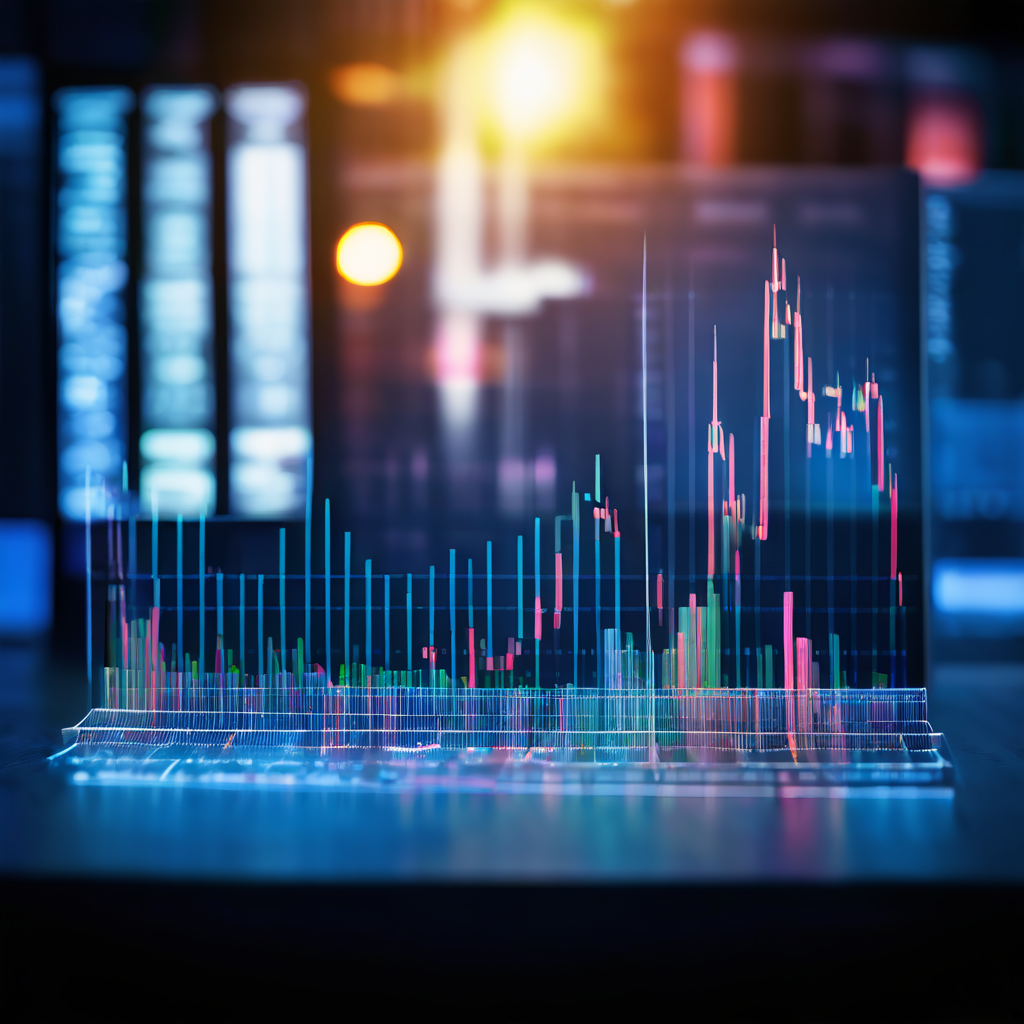**

# Introduction

In the realm of market analysis and forecasting, understanding the intricate patterns within time series data is paramount for informed decision-making. With the advent of machine learning techniques, it's now possible to delve deeper into historical market data to predict future trends accurately. This project focuses on developing a robust time series machine learning model to forecast market trends, using a dataset containing monthly market data spanning multiple years, encompassing various regions, commodities, and pricing information.

# Objective

The primary objective of this project is to develop a robust time series machine learning model capable of accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim to predict the quantity and prices of commodities for future months, empowering stakeholders to make proactive decisions regarding production, procurement, pricing strategies, and resource allocation.

# Dataset Information

The dataset used in this project comprises the following columns:

- **market**: The market or commodity under consideration.
- **month**: The month for which the data is recorded.
- **year**: The year corresponding to the recorded data.
- **quantity**: The quantity of the commodity traded or available.
- **priceMin**: The minimum price of the commodity during the month.
- **priceMax**: The maximum price of the commodity during the month.
- **priceMod**: The mode or most frequently occurring price of the commodity during the month.
- **state**: The state or region where the market is located.
- **city**: The city where the market is situated.
- **date**: The specific date of the recorded data.

# Research Question

How can we develop a time series forecasting model that accurately predicts the future quantity and prices of commodities based on historical market data?

# Approach of Analysis

**Data Preprocessing:**

Cleaning the dataset to handle missing values and encoding categorical variables.
Converting categorical data to numerical codes where necessary.

**Exploratory Data Analysis (EDA):**

Analyzing the temporal patterns to identify seasonality, trends, and anomalies within the data.
Visualizing the distribution of key variables such as quantity and average price across different markets and over time.

**Feature Engineering:**

Creating relevant features such as lagged variables, rolling statistics, and seasonal indicators (month and quarter).
Calculating rolling mean and standard deviation to capture trends and volatility.

**Model Selection and Training:**

Evaluating various time series forecasting models including ARIMA, SARIMA, Prophet, and LSTM.
Selecting the most suitable model based on performance metrics and training it on the dataset.

**Model Evaluation:**

Assessing the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
Performing the Augmented Dickey-Fuller (ADF) test to check the stationarity of the time series.

**Fine-tuning and Validation:**

Fine-tuning the model parameters and validating its performance on unseen data.
Iterating the model development process if necessary to improve accuracy.

## Imports

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [2]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.io as pio

# Enable Plotly in Colab
pio.renderers.default = 'colab'

In [ ]:
!pip install scikeras

In [ ]:
# Enable Plotly offline mode
py.init_notebook_mode(connected=True)

In [ ]:
!pip install --q pmdarima

In [6]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

import plotly.express as px
import tensorflow as tf
from sklearn.ensemble import IsolationForest
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers.recurrent import LSTM
from scikeras.wrappers import KerasRegressor

# Set plotting size and style
sns.set(rc = {'figure.figsize':(16, 8)})
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [8]:
# Load the dataset and parse the date
df = pd.read_csv('/content/MarketPricePrediction.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%B-%Y'))
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city       date  
0  ABOHAR 2005-01-01  
1  ABOHAR 2006-01-01  
2  ABOHAR 2010-01-01  
3  ABOHAR 2011-01-01  
4  ABOHAR 2012-01-01

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


In [ ]:
# Check unique markets
df['market'].unique()

array(['ABOHAR(PB)', 'AGRA(UP)', 'AHMEDABAD(GUJ)', 'AHMEDNAGAR(MS)',
       'AJMER(RAJ)', 'ALIGARH(UP)', 'ALWAR(RAJ)', 'AMRITSAR(PB)',
       'BALLIA(UP)', 'BANGALORE', 'BAREILLY(UP)', 'BELGAUM(KNT)',
       'BHATINDA(PB)', 'BHAVNAGAR(GUJ)', 'BHOPAL', 'BHUBNESWER(OR)',
       'BIHARSHARIF(BHR)', 'BIJAPUR(KNT)', 'BIKANER(RAJ)', 'BOMBORI(MS)',
       'BURDWAN(WB)', 'CHAKAN(MS)', 'CHALLAKERE(KNT)', 'CHANDIGARH',
       'CHANDVAD(MS)', 'CHENNAI', 'CHICKBALLAPUR(KNT)',
       'COIMBATORE(TN) (bellary)', 'COIMBATORE(TN) (podisu)',
       'DEESA(GUJ)', 'DEHRADOON(UTT)', 'DELHI', 'DEORIA(UP)',
       'DEVALA(MS)', 'DEWAS(MP)', 'DHAVANGERE(KNT)', 'DHULIA(MS)',
       'DINDIGUL(TN)', 'DINDIGUL(TN)(Podis', 'DINDORI(MS)', 'ETAWAH(UP)',
       'GONDAL(GUJ)', 'GORAKHPUR(UP)', 'GUWAHATI', 'HALDWANI(UTT)',
       'HASSAN(KNT)', 'HOSHIARPUR(PB)', 'HUBLI(KNT)', 'HYDERABAD',
       'INDORE(MP)', 'JAIPUR', 'JALANDHAR(PB)', 'JALGAON(MS)',
       'JALGAON(WHITE)', 'JAMMU', 'JAMNAGAR(GUJ)', 'JODHPUR(RAJ)',
 

In [ ]:
# Check unique states
df['state'].unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'MP', 'OR', 'BHR', 'WB',
       'CH', 'TN', 'DEL', 'ASM', 'AP', 'JK', 'HR', 'KER', 'JH', 'HP',
       'KEL'], dtype=object)

In [ ]:
# Check unique cities
df['city'].unique()

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [ ]:
# Check for missing values
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Create column for average price
df['priceAvg'] = (df['priceMin'] + df['priceMax']) / 2

In [ ]:
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city       date  priceAvg  
0  ABOHAR 2005-01-01     448.5  
1  ABOHAR 2006-01-01     562.5  
2  ABOHAR 2010-01-01    1437.5  
3  ABOHAR 2011-01-01    3408.5  
4  ABOHAR 2012-01-01     604.5

In [ ]:
# Descriptive statistics
df.describe()

year      quantity      priceMin      priceMax      priceMod  \
count  10227.000000  1.022700e+04  10227.000000  10227.000000  10227.000000   
mean    2009.022294  7.660488e+04    646.944363   1212.760731    984.284345   
min     1996.000000  2.000000e+01     16.000000    145.000000     80.000000   
25%     2006.000000  8.898000e+03    209.000000    557.000000    448.000000   
50%     2009.000000  2.746000e+04    440.000000    923.000000    747.000000   
75%     2013.000000  8.835650e+04    828.000000   1527.000000   1248.000000   
max     2016.000000  1.639032e+06   6000.000000   8192.000000   6400.000000   
std        4.372841  1.244087e+05    673.121850    979.658874    818.471498   

                                date      priceAvg  
count                          10227  10227.000000  
mean   2009-06-22 18:57:58.556761344    929.852547  
min              1996-01-01 00:00:00     97.500000  
25%              2006-04-01 00:00:00    413.250000  
50%              2009-11-01 00:00:00    703.500000  
75%              2013-03-01 00:00:00   1169.250000  
max              2016-02-01 00:00:00   6400.000000  
std                              NaN    781.636897

## Exploratory Data Analysis (EDA)

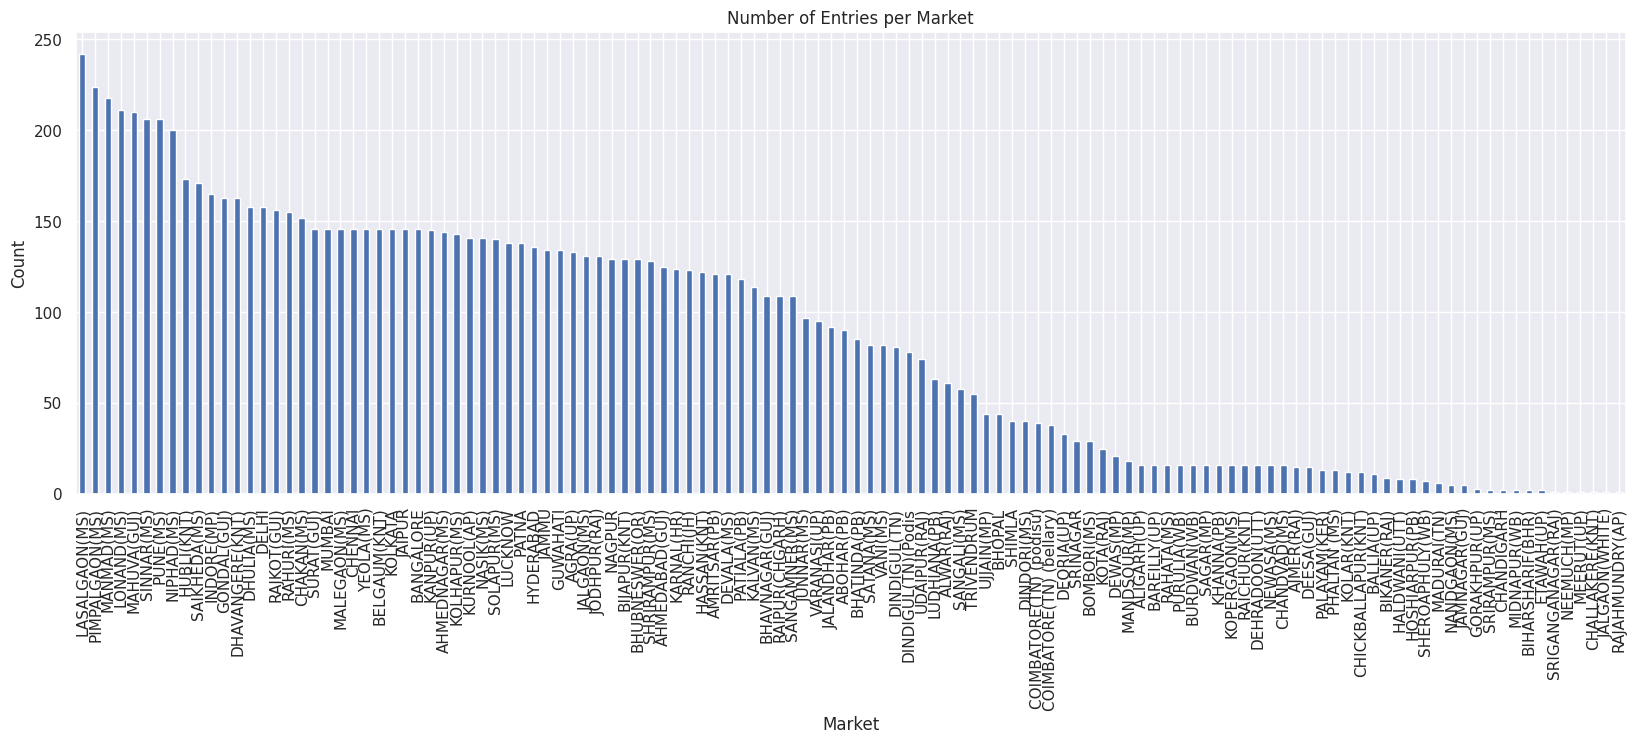

In [ ]:
# Count plot for the number of entries per market
market_counts = df['market'].value_counts()
market_counts.plot(kind='bar', figsize=(20, 6))
plt.title('Number of Entries per Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.show()

From the number of records per market above we observe that Lasalgaon, Pimpalgaon, Manmad are the top 3 markets were we have the most recorded observations.

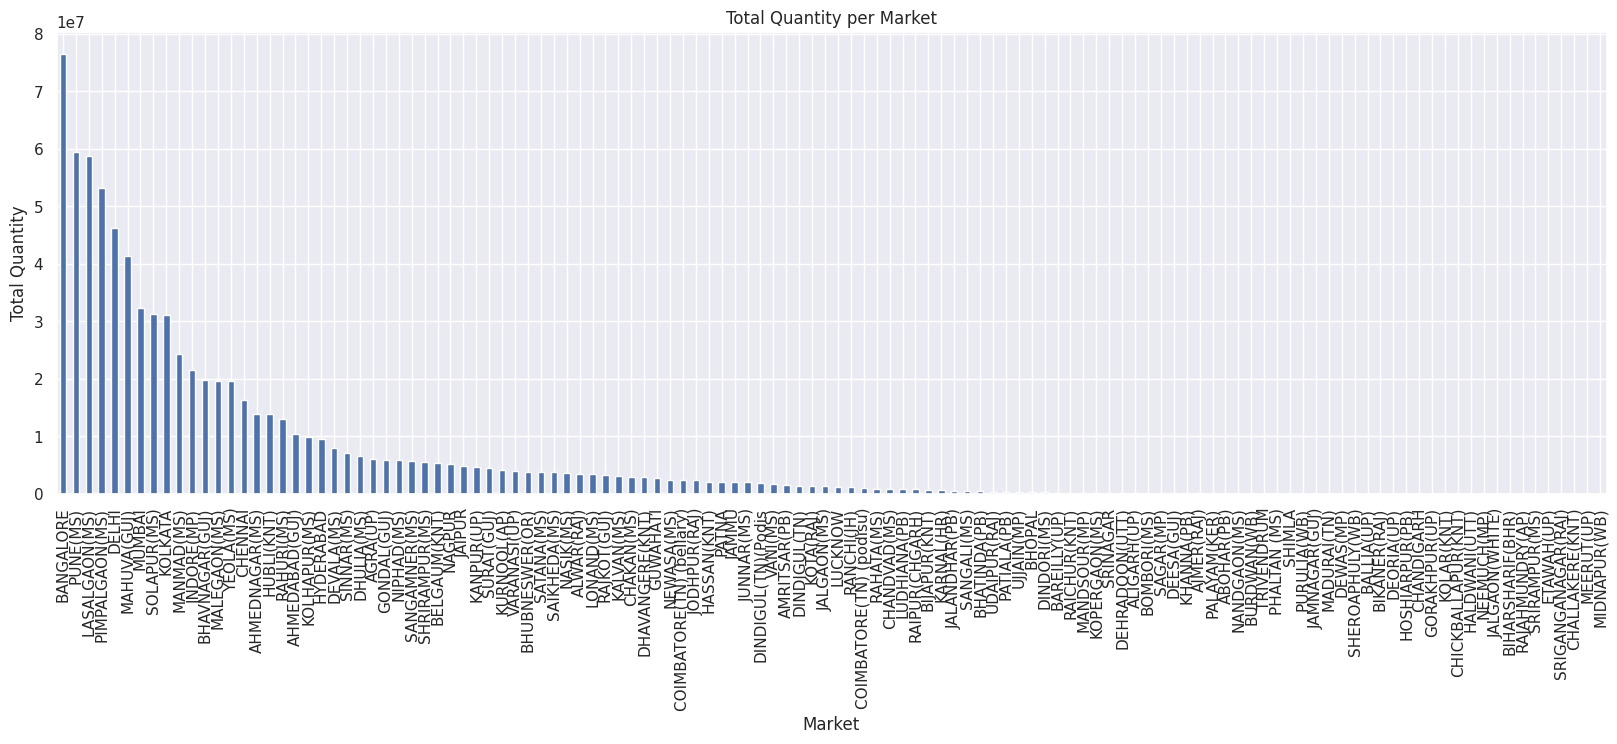

In [ ]:
# Sum of quantities per market
market_quantity = df.groupby('market')['quantity'].sum().sort_values(ascending=False)
market_quantity.plot(kind='bar', figsize=(20, 6))
plt.title('Total Quantity per Market')
plt.xlabel('Market')
plt.ylabel('Total Quantity')
plt.show()

Here, we observe the total quantities of commodities traded across different markets. Bangalore, Pune and Lasalgaon are the top 3 markets with the highest quantities traded.

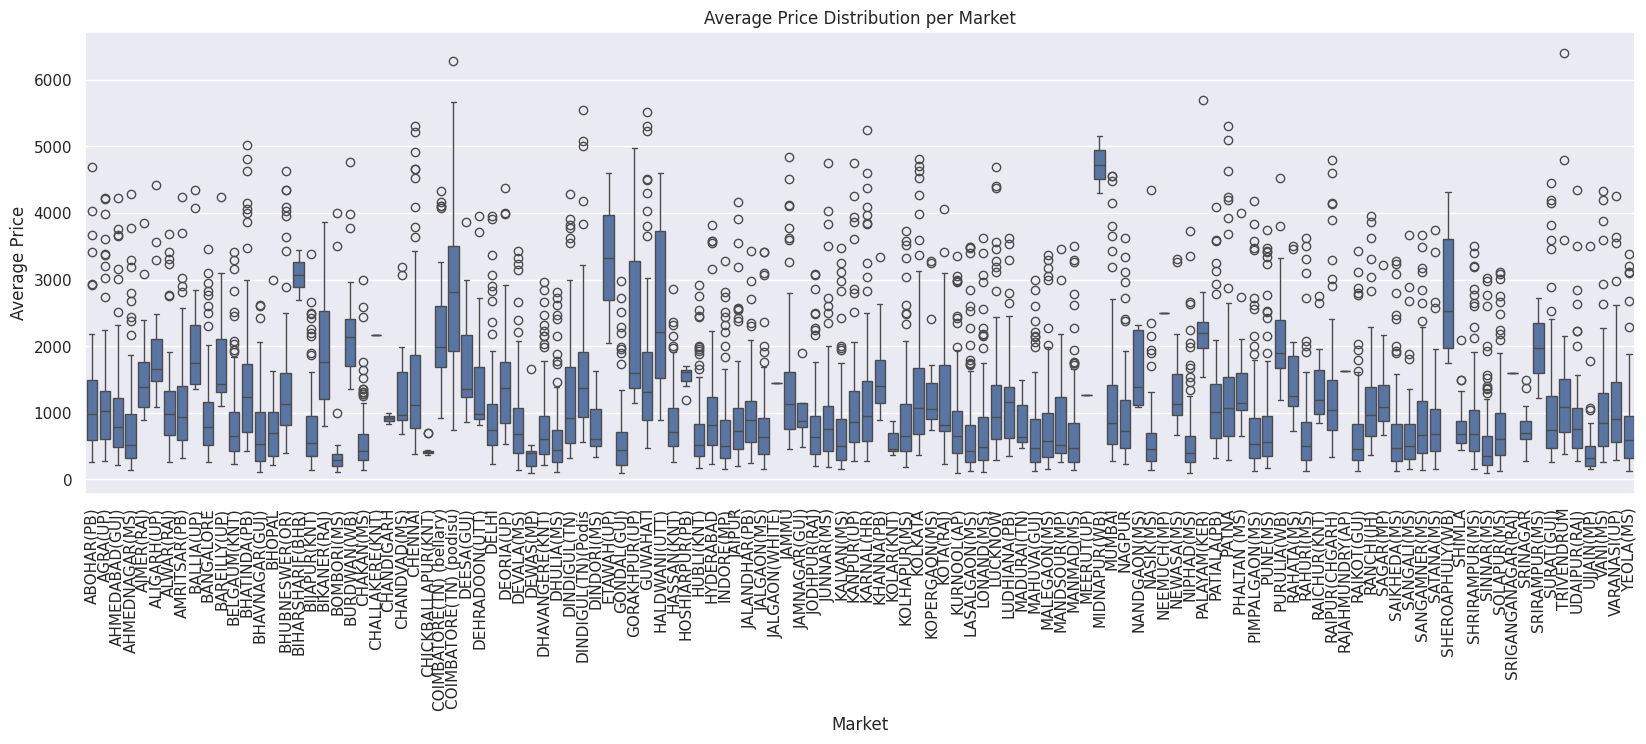

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='market', y='priceAvg', data=df)
plt.title('Average Price Distribution per Market')
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

The boxplots here provide the variability and central tendency of prices within each market. We notice outliers in most of the markets. Also, we can observe the small boxplot of Midnapur to be higher than the rest, indicating that the overall price range for that market is higher.

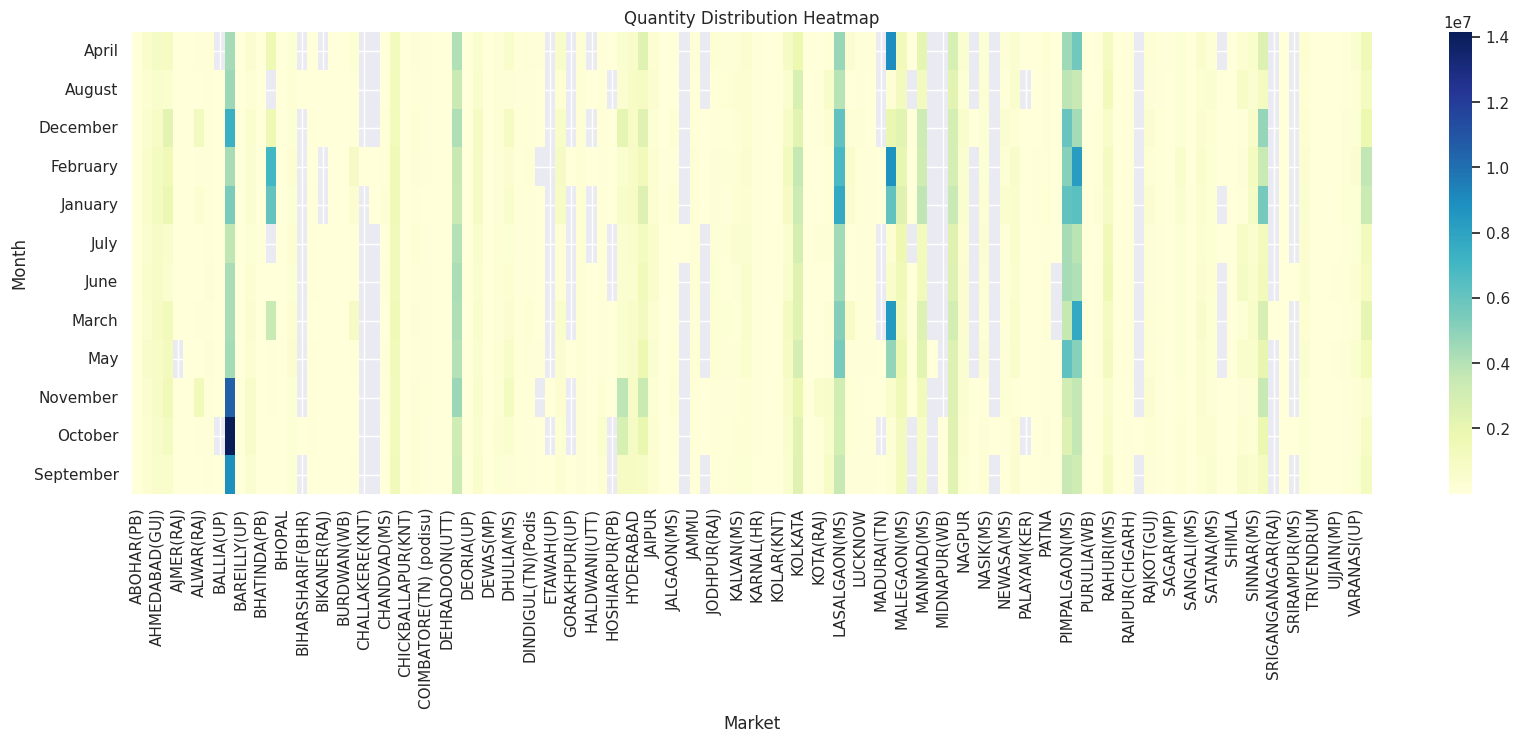

In [ ]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(values='quantity', index='month', columns='market', aggfunc='sum')

plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Quantity Distribution Heatmap')
plt.xlabel('Market')
plt.ylabel('Month')
plt.show()

The heatmap provides a visual representation of the distribution of total quantities of commodities traded across different markets and months. For example, it can highlight peak trading periods for certain markets or identify markets with consistently high or low trading volumes, like in the case of Ballia for September, October and November where we see getting darker blue indicating a high trading period.

In [ ]:
# Group by market and sum the quantities
market_quantity = df.groupby('market')['quantity'].sum().reset_index()

# Define a threshold to consider a market as major (top 20 markets)
threshold = market_quantity['quantity'].nlargest(20).min()

# Filter out minor markets and group them as "Others"
market_quantity.loc[market_quantity['quantity'] < threshold, 'market'] = 'Others'

# Sum the quantities for the "Others" category
market_quantity = market_quantity.groupby('market')['quantity'].sum().reset_index()

# Create a pie chart using Plotly
fig = px.pie(market_quantity, values='quantity', names='market', title='Quantity Distribution per Market')
fig.show()

The pie chart visualizes the distribution of total quantities of commodities traded across major markets, with smaller markets grouped into an "Others" category. We can see this distribution more clearly in the next treemap, where each rectangle represents a market, and the size of the rectangle is proportional to the total quantity traded in that market.

In [ ]:
fig = px.treemap(df, path=['market'], values='quantity', title='Quantity Distribution Treemap')
fig.show()

In [ ]:
fig = px.treemap(df, path=['market'], values='priceAvg', title='Average Price Distribution Treemap')
fig.show()

This treemap helps to quickly identify which markets have higher and lower average prices. It provides a hierarchical view of the data, making it easy to compare the relative sizes of different markets in terms of average price. Guwahati, Chennai and Kolkata have the higher prices.

## Distributions

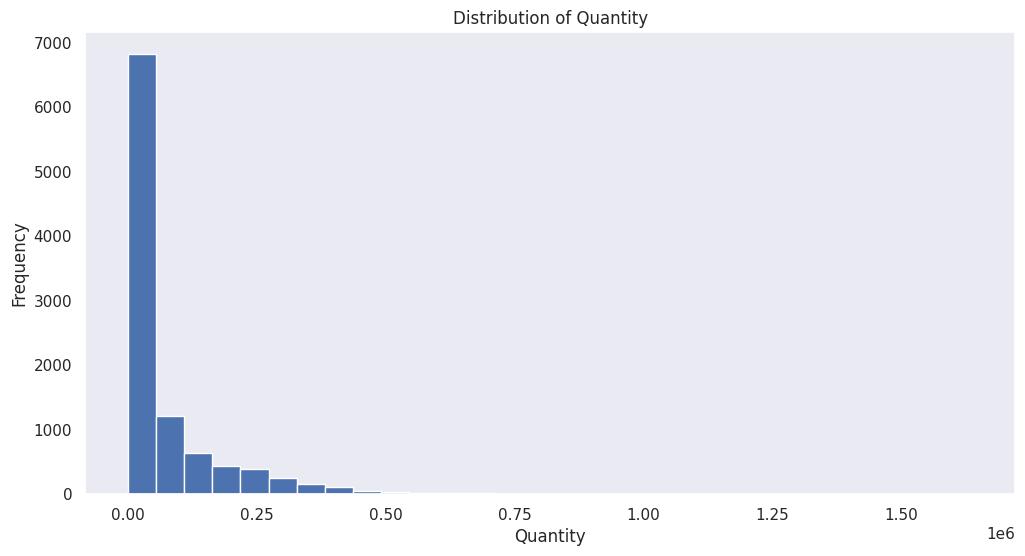

In [ ]:
df['quantity'].hist(bins=30, figsize=(12, 6))
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The distribution of quantity is right skewed, indicating that there are a number of high quantity values that are less frequent but significantly larger than the rest.

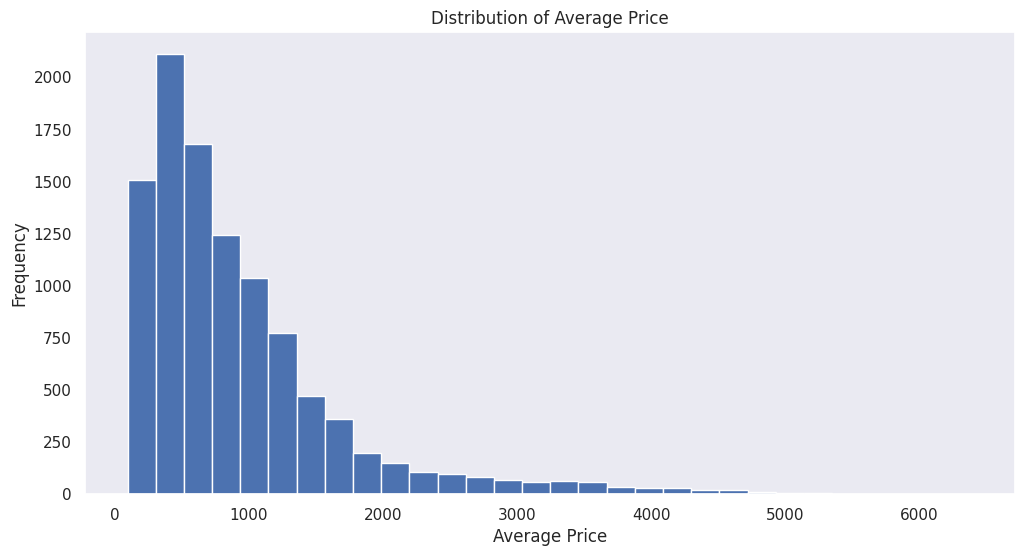

In [ ]:
df['priceAvg'].hist(bins=30, figsize=(12, 6))
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Average price is also right skewed, but with smaller tail indicating that the outliers are less here.

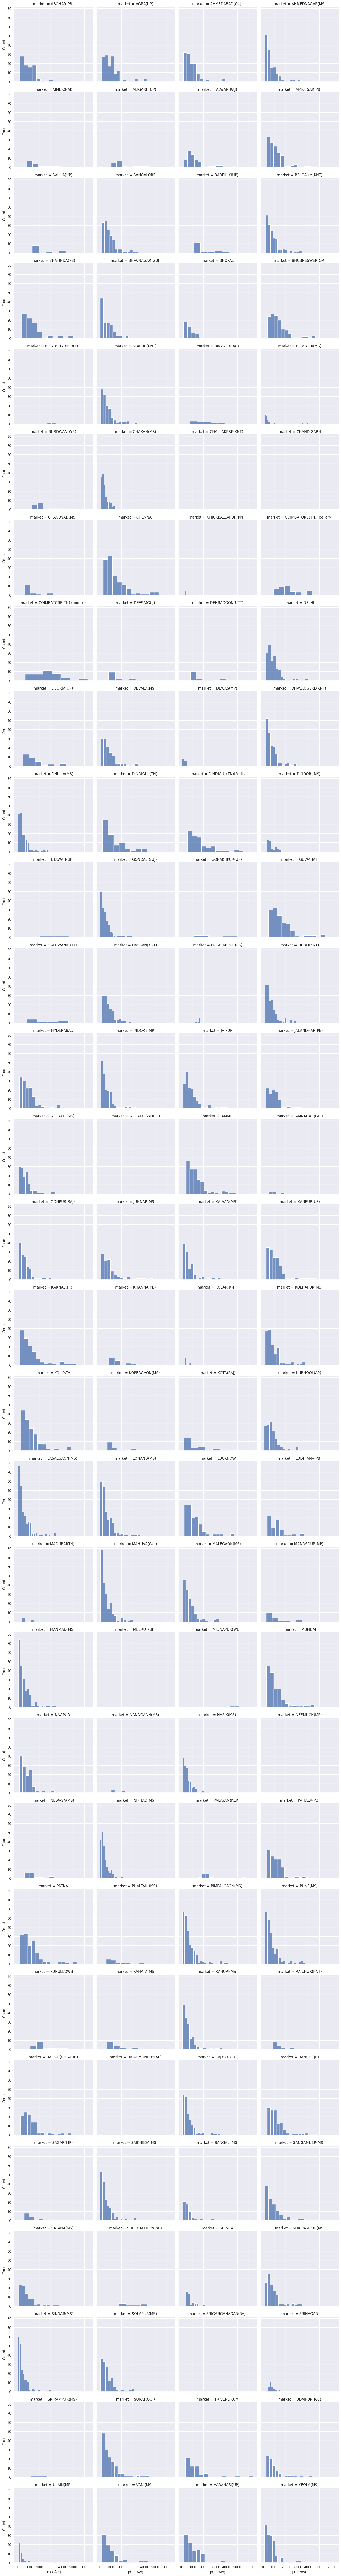

In [ ]:
# Create a grid of average price histograms for each market
g = sns.FacetGrid(df, col="market", col_wrap=4, height=4)
g.map(sns.histplot, "priceAvg")
plt.show()

This FacetGrid visualization helps to understand the pricing dynamics within each market and allows for market-specific analysis of price distributions. Each histogram represents the distribution of average prices for a specific market, allowing for a comparison of price distributions across different markets.

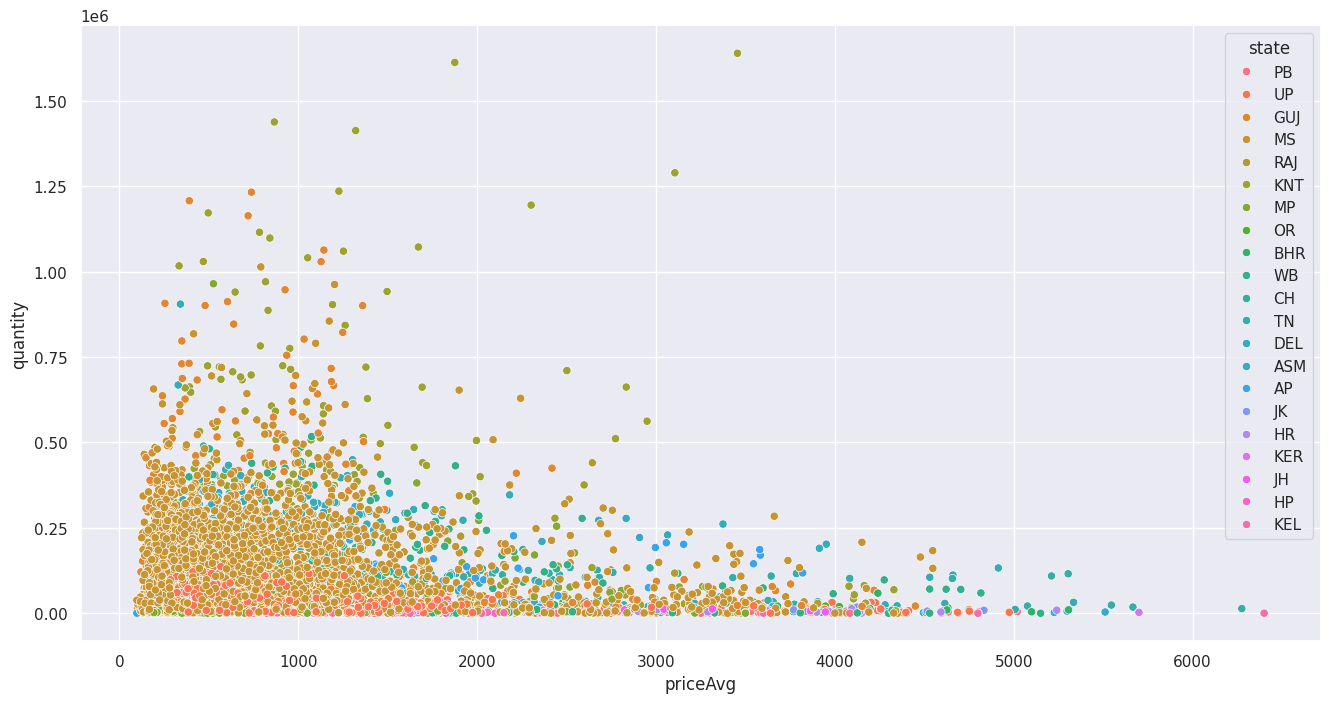

In [ ]:
# Create a scatter plot to visualize the relationship between average price and quantity colored by state
sns.scatterplot(x=df['priceAvg'], y=df['quantity'], hue=df['state'], data=df)
plt.show()

In [ ]:
# Drop unnecessary columns
df.drop(["state",	"city"], axis=1, inplace=True)
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod  \
0  ABOHAR(PB)  January  2005      2350       404       493       446   
1  ABOHAR(PB)  January  2006       900       487       638       563   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433   
4  ABOHAR(PB)  January  2012      1035       523       686       605   

        date  priceAvg  
0 2005-01-01     448.5  
1 2006-01-01     562.5  
2 2010-01-01    1437.5  
3 2011-01-01    3408.5  
4 2012-01-01     604.5

In [ ]:
# Convert the market column from a categorical variable to numerical codes
df['market'] = df['market'].astype('category').cat.codes

## Time Series Visualizations

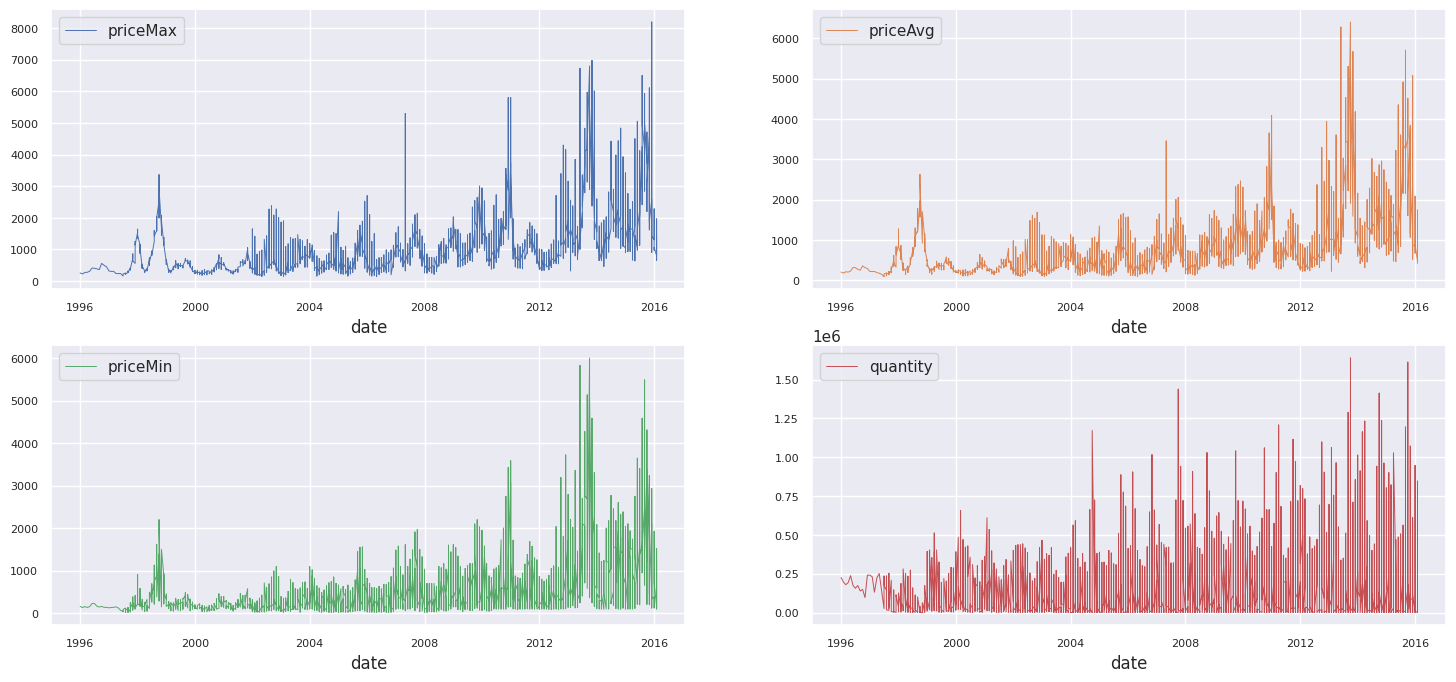

In [ ]:
# A subset of the DataFrame
df_subset = df.set_index('date')[['priceMax', 'priceAvg', 'priceMin', 'quantity']]

# Create a facetted graph with 2 rows and 2 columns
ax = df_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=8,
                      legend=True,
                      figsize=(18, 8))

plt.show()

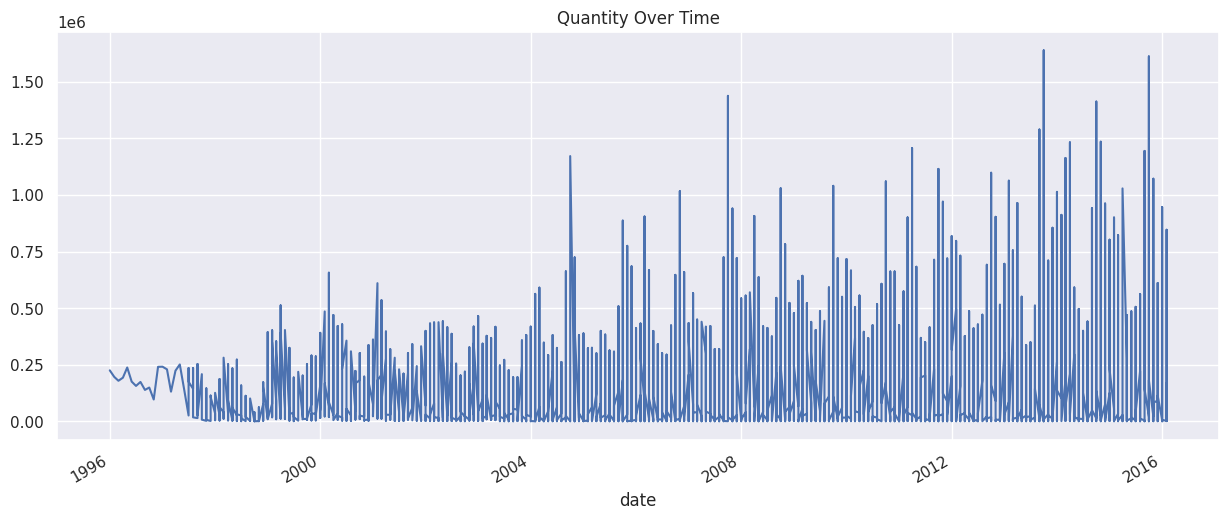

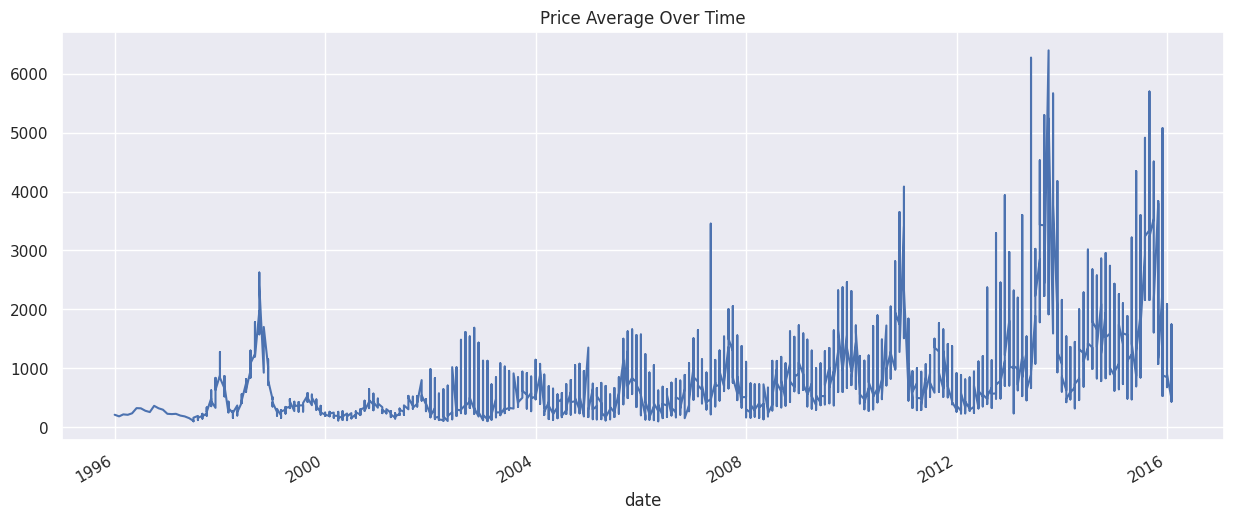

In [ ]:
# Plotting the quantity over time
df.set_index('date')['quantity'].plot(figsize=(15, 6))
plt.title('Quantity Over Time')
plt.show()

# Plotting the priceAvg over time
df.set_index('date')['priceAvg'].plot(figsize=(15, 6))
plt.title('Price Average Over Time')
plt.show()

## Detect Anomalies Using Isolation Forest

In [ ]:
# Fit the Isolation Forest model
model_quantity = IsolationForest(contamination=0.01)
df['quantity_anomaly'] = model_quantity.fit_predict(df[['quantity']])
df['quantity_anomaly'] = df['quantity_anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [ ]:
df.set_index('date', inplace=True)

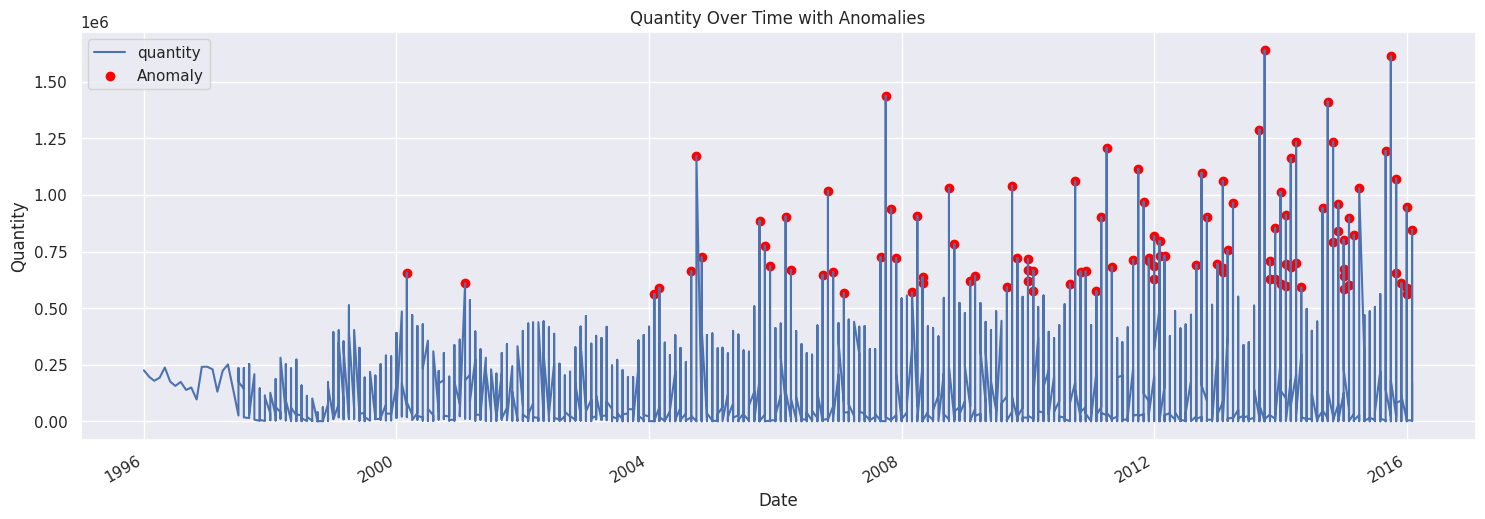

In [ ]:
plt.figure(figsize=(18, 6))

df['quantity'].plot()
plt.scatter(df[df['quantity_anomaly'] == 1].index,
            df[df['quantity_anomaly'] == 1]['quantity'],
            color='red', label='Anomaly')
plt.title('Quantity Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Anomalies are detected as periodic spikes, indicating specific events or outliers that cause sudden increases in the quantity.

            market     month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                         
2014-01-01       9   January  2014    606710       404      1296      1094   
2015-01-01       9   January  2015    583681       313      1967      1602   
2014-03-01       9     March  2014    683236       294      1078       748   
2014-04-01       9     April  2014    697423       307      1166       712   
2014-05-01       9       May  2014    591250       250      1495       941   
...            ...       ...   ...       ...       ...       ...       ...   
2015-11-01     109  November  2015    653066       211      3588      1400   
2011-12-01     109  December  2011    719365       100      1041       419   
2013-12-01     109  December  2013    855182       161      2185      1222   
2014-12-01     109  December  2014    962233       135      2271      1035   
2015-12-01     109  December  2015    610943       142      2382

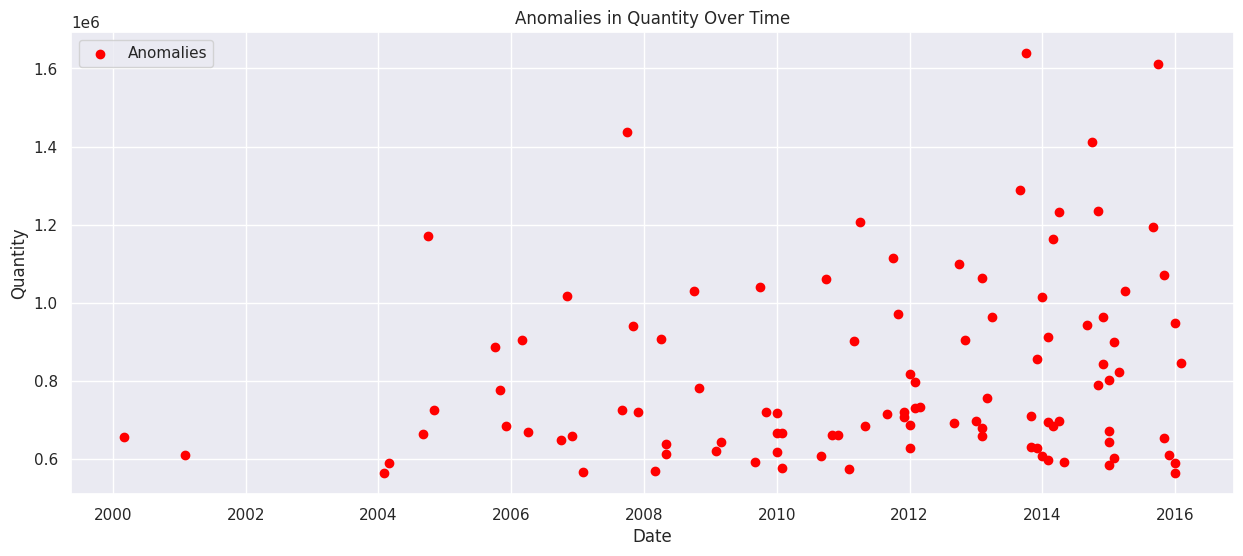

In [ ]:
# Separate anomalies for further analysis
anomalies_quantity = df[df['quantity_anomaly'] == 1]

# Display the anomalies
print(anomalies_quantity)

# Plot anomalies separately to visualize their distribution
plt.figure(figsize=(15, 6))
plt.scatter(anomalies_quantity.index, anomalies_quantity['quantity'], color='red', label='Anomalies')
plt.title('Anomalies in Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [ ]:
# Fit the Isolation Forest model and detect anomalies in priceAvg
model_priceAvg = IsolationForest(contamination=0.01)
df['priceAvg_anomaly'] = model_priceAvg.fit_predict(df[['priceAvg']])
df['priceAvg_anomaly'] = df['priceAvg_anomaly'].apply(lambda x: 1 if x == -1 else 0)

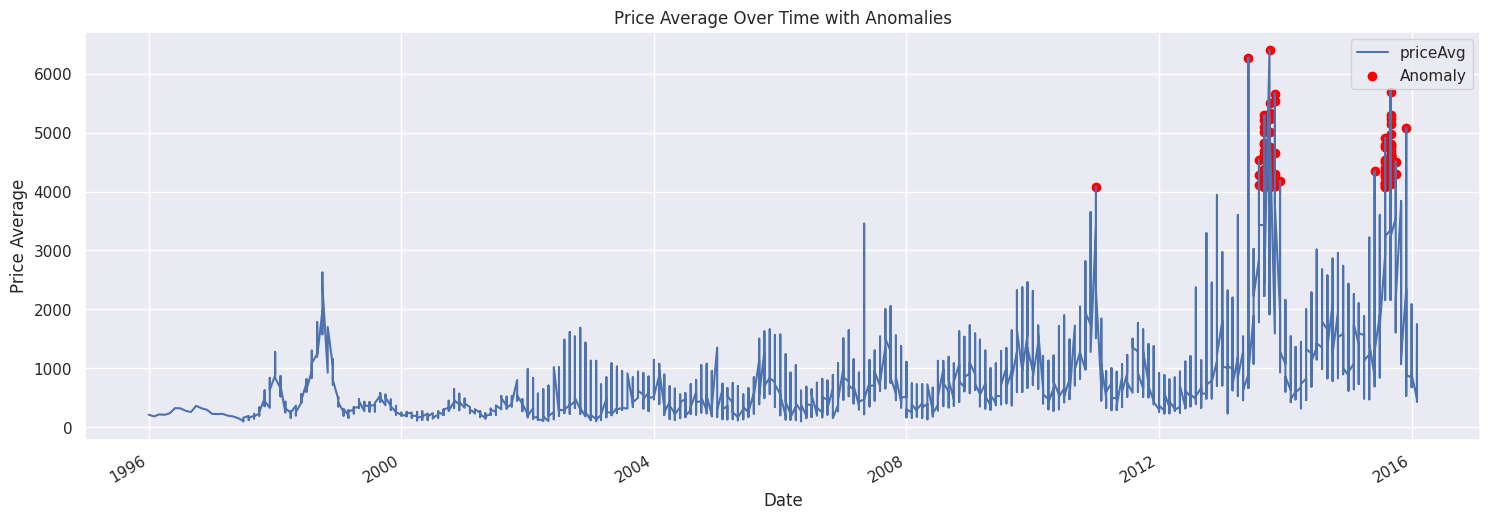

In [ ]:
# Plotting the priceAvg over time with anomalies
plt.figure(figsize=(18, 6))
df['priceAvg'].plot()
plt.scatter(df[df['priceAvg_anomaly'] == 1].index,
            df[df['priceAvg_anomaly'] == 1]['priceAvg'],
            color='red', label='Anomaly')
plt.title('Price Average Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Price Average')
plt.legend()
plt.show()

In the average price time series, anomalies are consistently detected in certain periods, further investigation might be required to understand the underlying causes, such as data errors, market events etc.

            market      month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                          
2013-09-01       0  September  2013       575      4273      5109      4800   
2013-09-01       1  September  2013     30740      4098      4357      4225   
2013-10-01       1    October  2013     31800      4020      4384      4280   
2013-09-01       2  September  2013     67185      3370      5068      4494   
2015-08-01       3     August  2015     15820      2258      6300      4383   
...            ...        ...   ...       ...       ...       ...       ...   
2013-10-01     114    October  2013       280      6000      6800      6400   
2013-09-01     115  September  2013      7078      3820      4860      4360   
2013-09-01     117  September  2013       869      4000      4658      4325   
2015-09-01     117  September  2015      3501      3731      4648      4190   
2015-09-01     118  September  2015     12635      4

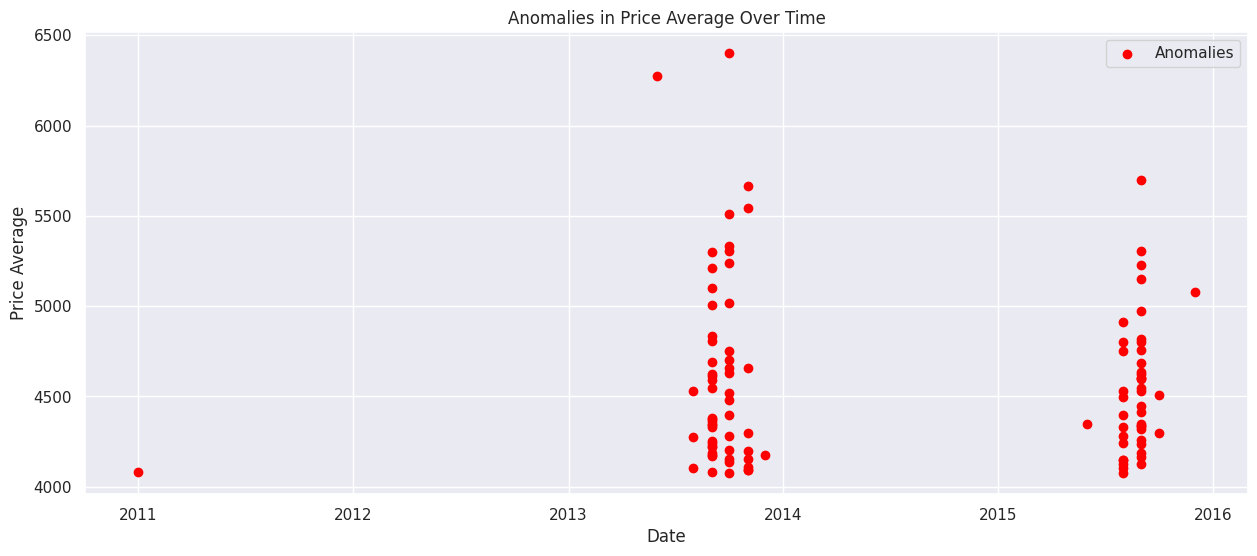

In [ ]:
# Separate anomalies for further analysis
anomalies_priceAvg = df[df['priceAvg_anomaly'] == 1]

# Display the anomalies
print(anomalies_priceAvg)

# Plot anomalies separately to visualize their distribution
plt.figure(figsize=(15, 6))
plt.scatter(anomalies_priceAvg.index, anomalies_priceAvg['priceAvg'], color='red', label='Anomalies')
plt.title('Anomalies in Price Average Over Time')
plt.xlabel('Date')
plt.ylabel('Price Average')
plt.legend()
plt.show()

## Feature Engineering

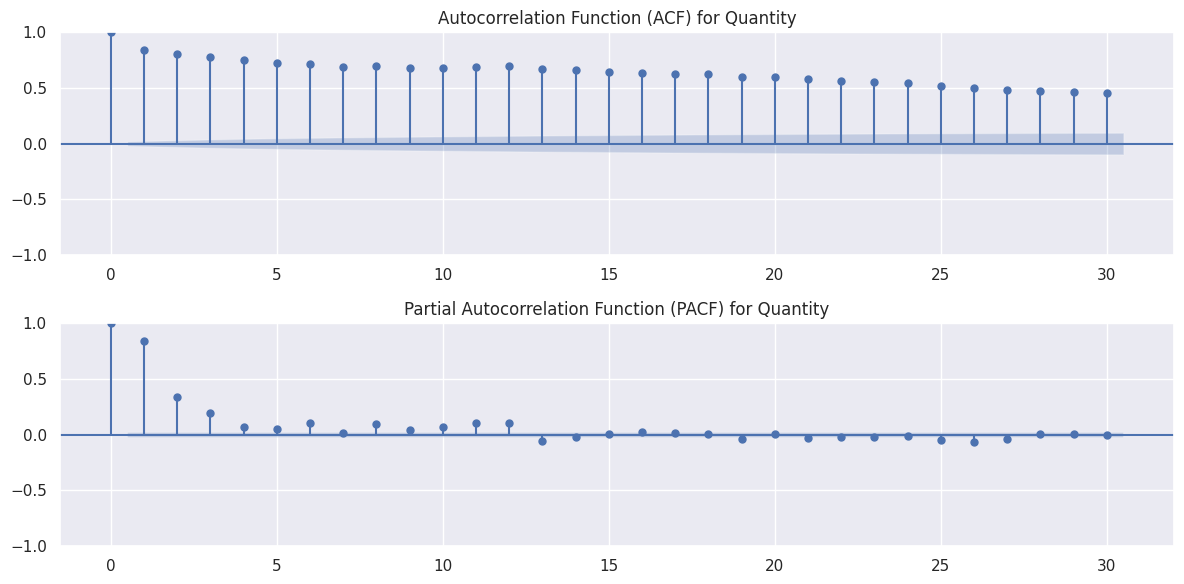

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for quantity
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['quantity'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Quantity')

plt.subplot(2, 1, 2)
plot_pacf(df['quantity'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Quantity')

plt.tight_layout()
plt.show()

- The ACF plot shows a slow decay, which suggests the presence of seasonality or a long-term trend in the data. Seasonal decomposition or differencing might be necessary to make the series stationary before applying further modeling techniques.
- The PACF plot shows significant spikes at the first few lags and then quickly drops off, it suggests that the data may follow an autoregressive process. The significant spikes in the PACF plot at the first few lags suggest that an AR model can be a good fit for the data.

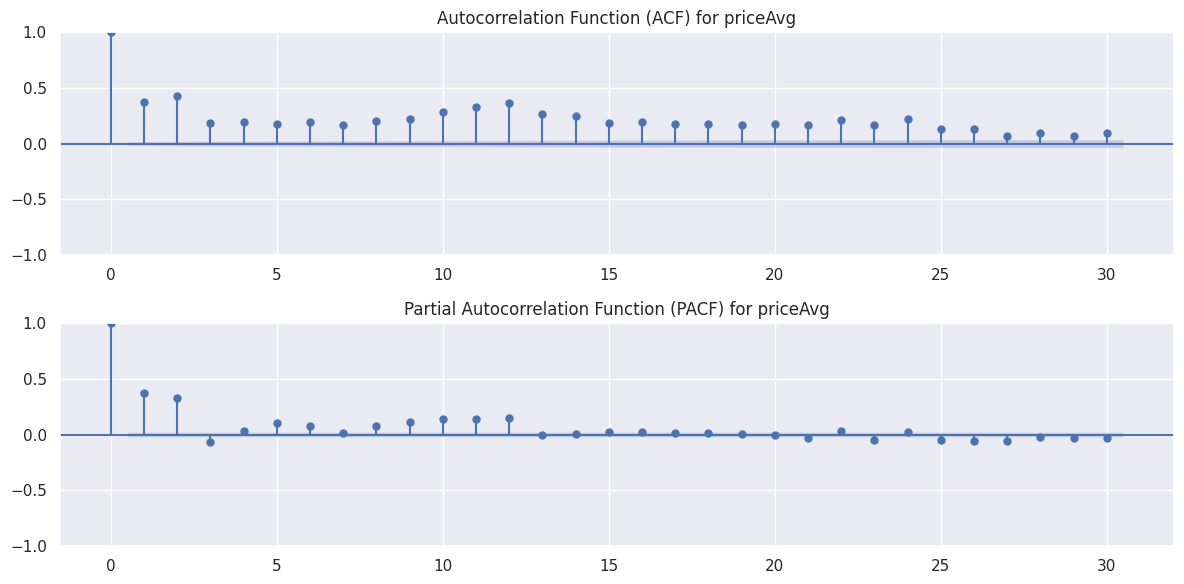

In [ ]:
# Plot ACF and PACF for priceAvg
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['priceAvg'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for priceAvg')

plt.subplot(2, 1, 2)
plot_pacf(df['priceAvg'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for priceAvg')

plt.tight_layout()
plt.show()

- The ACF plot shows a wave pattern with positive spikes, indicating a periodic or seasonal component in the priceAvg data.
- The PACF plot shows both positive and negative spikes at various lags. These alternating positive and negative spikes can indicate complex relationships between priceAvg values at different lags, possibly due to seasonality or other cyclical effects.

In [ ]:
df = df.reset_index()

# Lagged features
df['quantity_lag1'] = df['quantity'].shift(1)
df['priceAvg_lag1'] = df['priceAvg'].shift(1)

# Rolling statistics
df['quantity_rolling_mean_3'] = df['quantity'].rolling(window=3).mean()
df['priceAvg_rolling_mean_3'] = df['priceAvg'].rolling(window=3).mean()

# Seasonal indicators (month and quarter)
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# Drop rows with NaN values created by shifting
df = df.dropna()

# Display the engineered features
df.head()

date  market  month  year  quantity  priceMin  priceMax  priceMod  \
2 2010-01-01       0      1  2010       790      1283      1592      1460   
3 2011-01-01       0      1  2011       245      3067      3750      3433   
4 2012-01-01       0      1  2012      1035       523       686       605   
5 2013-01-01       0      1  2013       675      1327      1900      1605   
6 2014-01-01       0      1  2014       440      1025      1481      1256   

   priceAvg  quantity_anomaly  priceAvg_anomaly  quantity_lag1  priceAvg_lag1  \
2    1437.5                 0                 0          900.0          562.5   
3    3408.5                 0                 0          790.0         1437.5   
4     604.5                 0                 0          245.0         3408.5   
5    1613.5                 0                 0         1035.0          604.5   
6    1253.0                 0                 0          675.0         1613.5   

   quantity_rolling_mean_3  priceAvg_rolling_mean_3  quarter  
2              1346.666667               816.166667        1  
3               645.000000              1802.833333        1  
4               690.000000              1816.833333        1  
5               651.666667              1875.500000        1  
6               716.666667              1157.000000        1

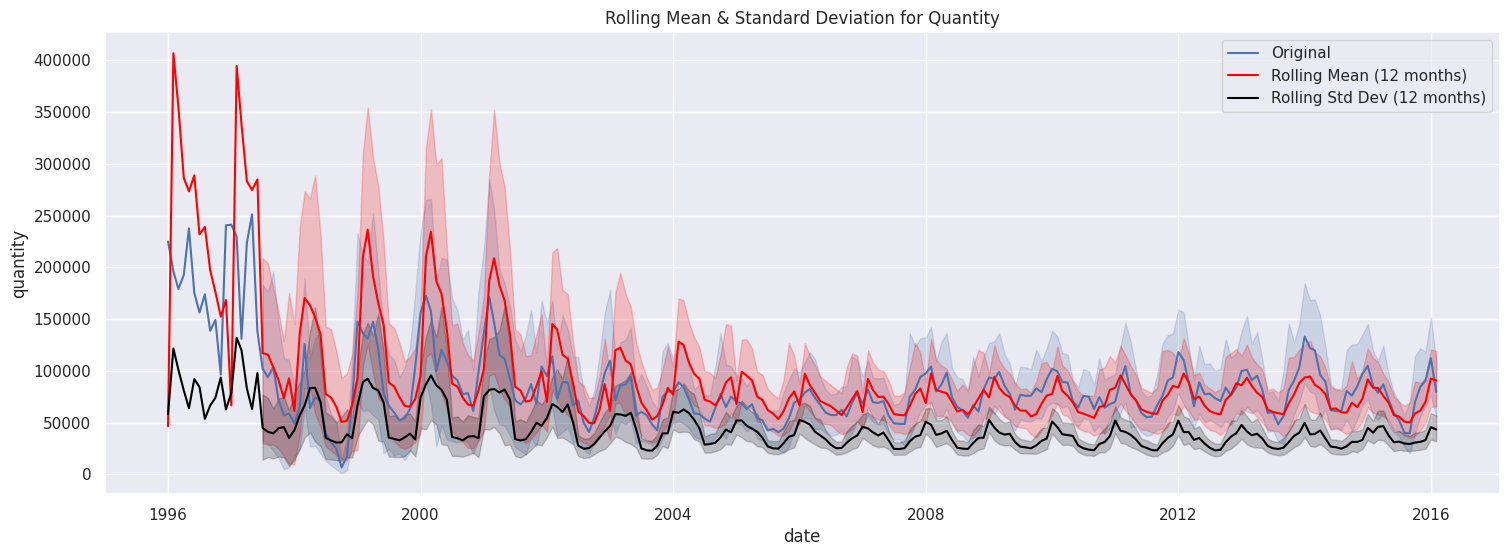

In [ ]:
rolling_mean = df['quantity'].rolling(window=12).mean()
rolling_std = df['quantity'].rolling(window=12).std()

plt.figure(figsize=(18, 6))
sns.lineplot(x=df['date'], y=df['quantity'], data=df, label='Original')
sns.lineplot(x=df['date'], y=rolling_mean, data=df, label='Rolling Mean (12 months)', color='red')
sns.lineplot(x=df['date'], y=rolling_std, data=df, label='Rolling Std Dev (12 months)', color='black')
plt.title('Rolling Mean & Standard Deviation for Quantity')
plt.legend()
plt.show()

- The rolling mean (red line) shows an downward trend over time, which indicates that the average quantity is decreasing.
- The rolling standard deviation (black line) shows periodic spikes in the beggining, which indicates periods of high volatility in the quantity and later it smooths out.

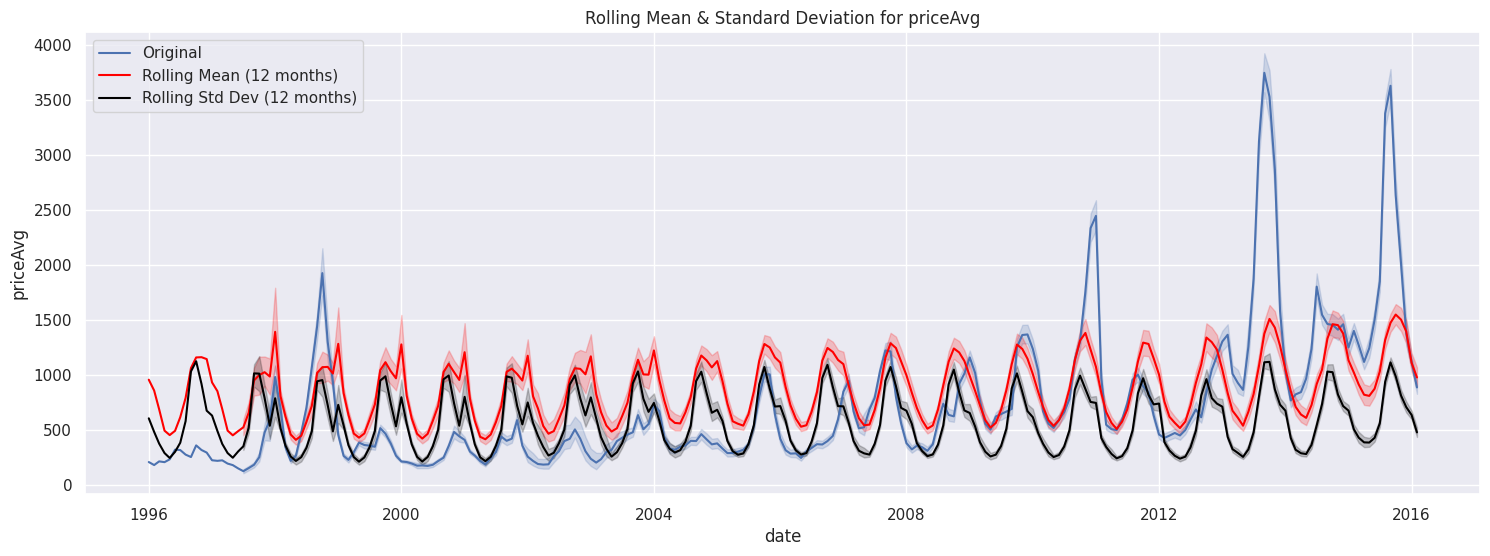

In [ ]:
rolling_mean_price = df['priceAvg'].rolling(window=12).mean()
rolling_std_price = df['priceAvg'].rolling(window=12).std()

plt.figure(figsize=(18, 6))
sns.lineplot(x=df['date'], y=df['priceAvg'], data=df, label='Original')
sns.lineplot(x=df['date'], y=rolling_mean_price, data=df, label='Rolling Mean (12 months)', color='red')
sns.lineplot(x=df['date'], y=rolling_std_price, data=df, label='Rolling Std Dev (12 months)', color='black')
plt.title('Rolling Mean & Standard Deviation for priceAvg')
plt.legend()
plt.show()

- The slight upward trend in the rolling mean (red line) indicates a consistent increase in average prices over time. This could be due to factors like inflation, increased demand, or changes in market conditions.
- The up and down spikes in the rolling standard deviation (black line) highlight periods of high and low volatility in prices. This could be due to seasonal effects, market disruptions, or other external factors affecting price stability.

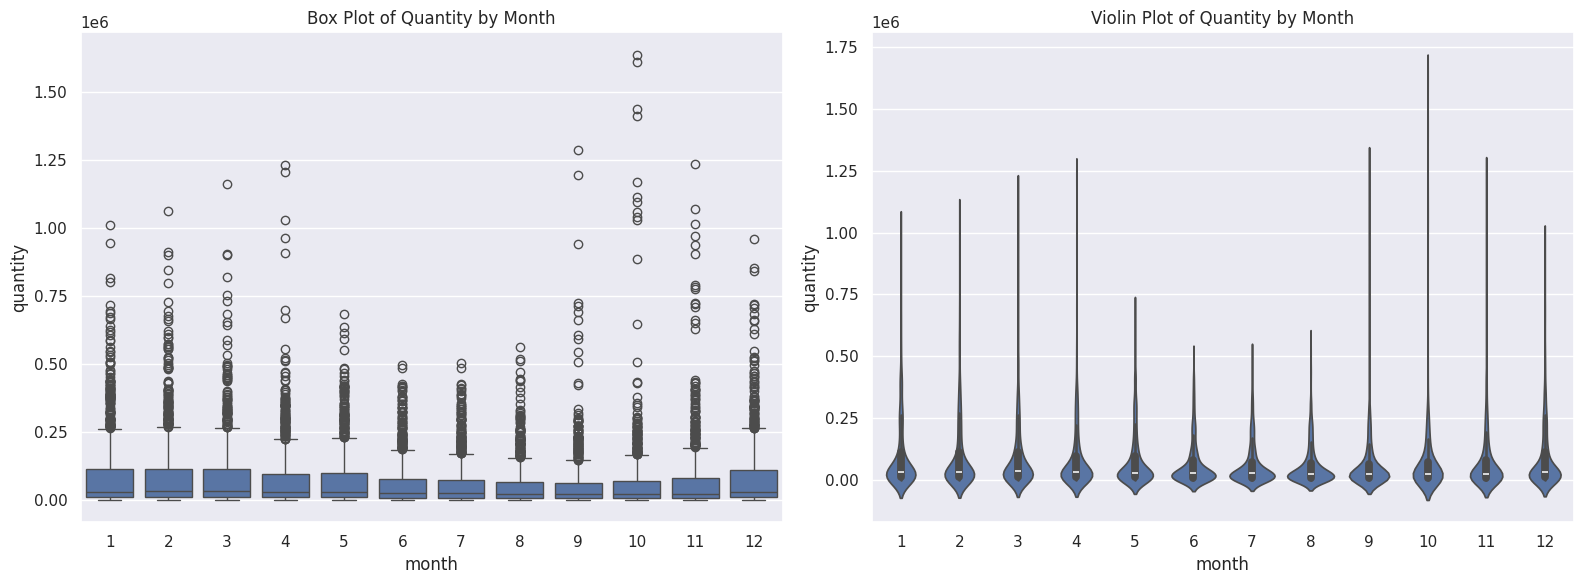

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='month', y='quantity', data=df)
plt.title('Box Plot of Quantity by Month')

plt.subplot(1, 2, 2)
sns.violinplot(x='month', y='quantity', data=df)
plt.title('Violin Plot of Quantity by Month')

plt.tight_layout()
plt.show()

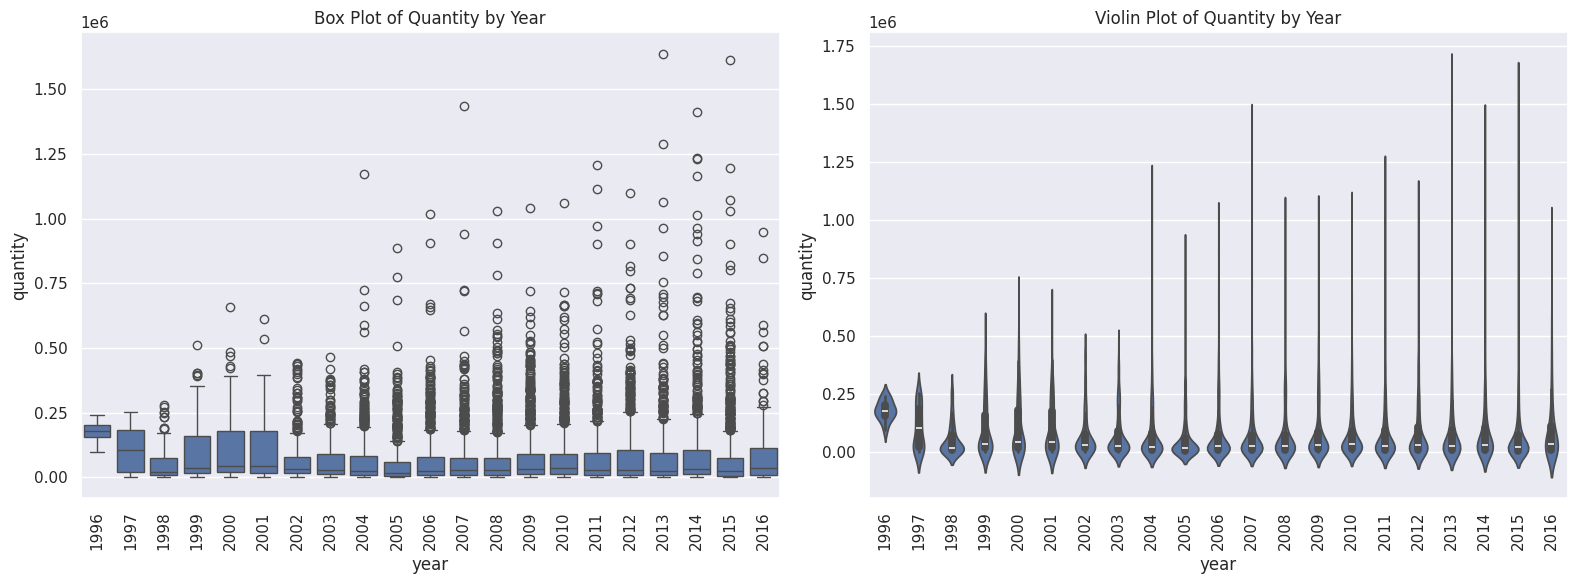

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='quantity', data=df)
plt.title('Box Plot of Quantity by Year')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.violinplot(x='year', y='quantity', data=df)
plt.title('Violin Plot of Quantity by Year')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

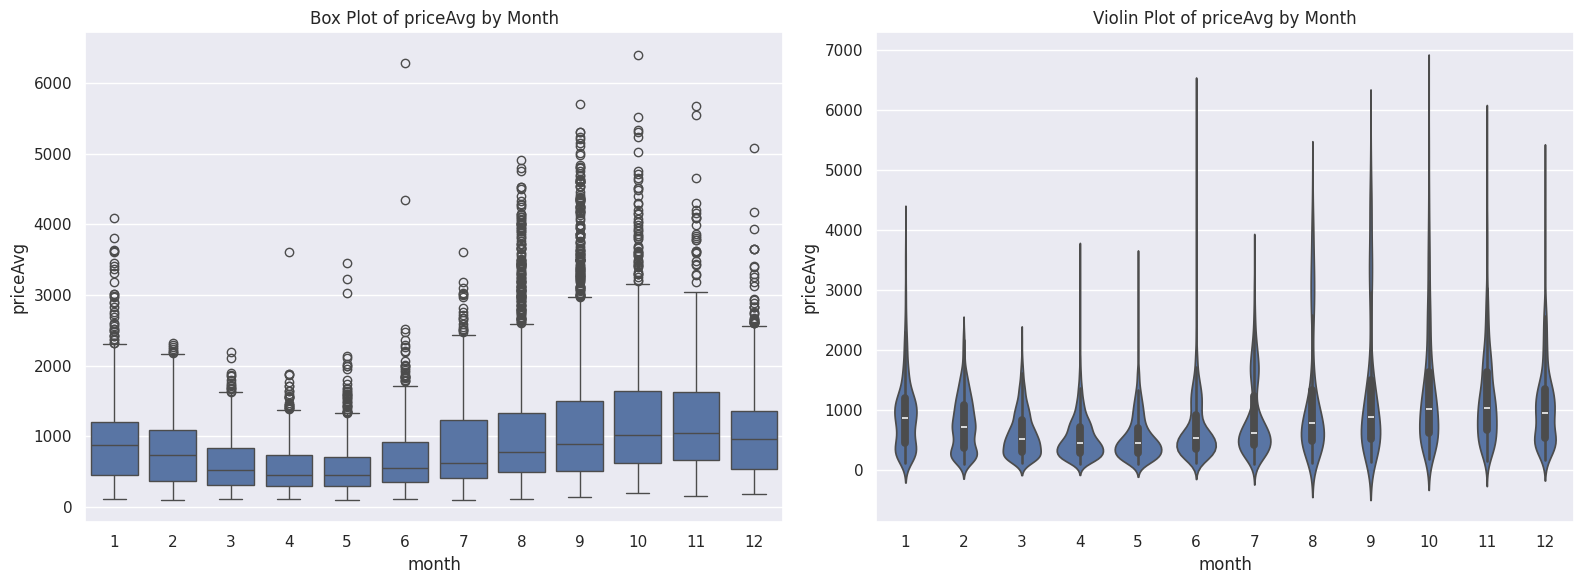

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='month', y='priceAvg', data=df)
plt.title('Box Plot of priceAvg by Month')

plt.subplot(1, 2, 2)
sns.violinplot(x='month', y='priceAvg', data=df)
plt.title('Violin Plot of priceAvg by Month')

plt.tight_layout()
plt.show()

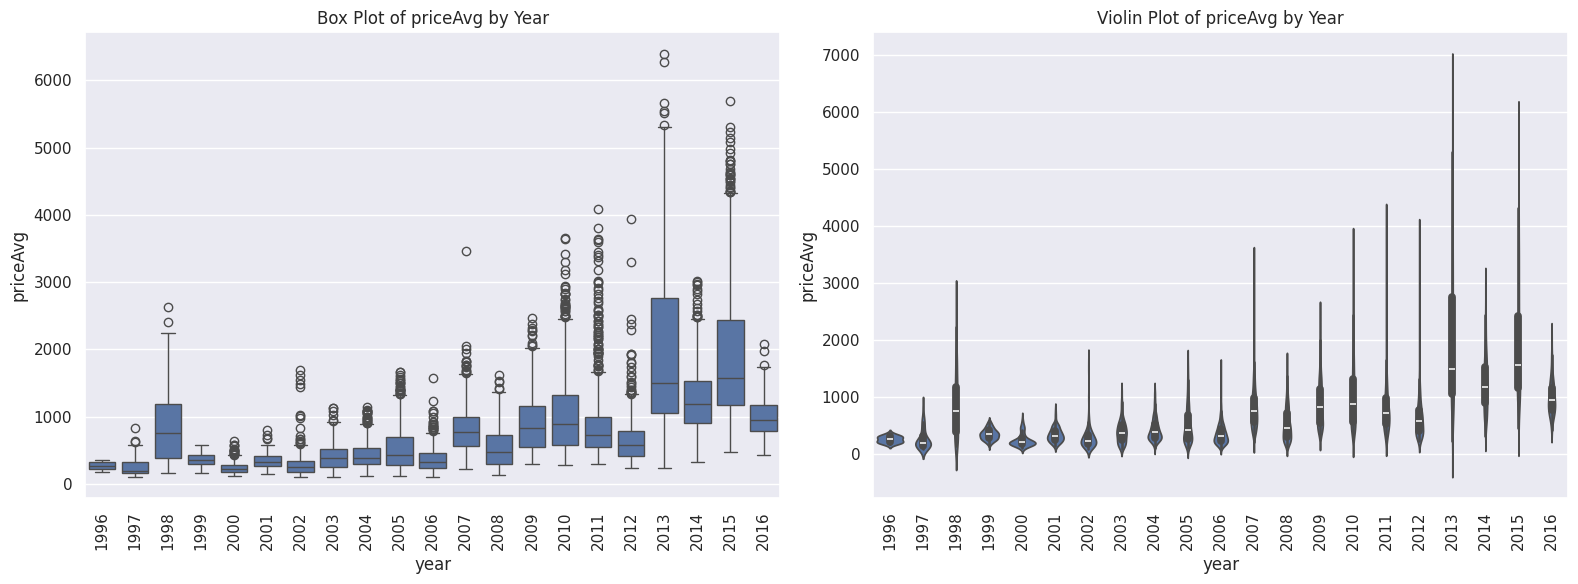

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='priceAvg', data=df)
plt.title('Box Plot of priceAvg by Year')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.violinplot(x='year', y='priceAvg', data=df)
plt.title('Violin Plot of priceAvg by Year')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Seasonal decomposition

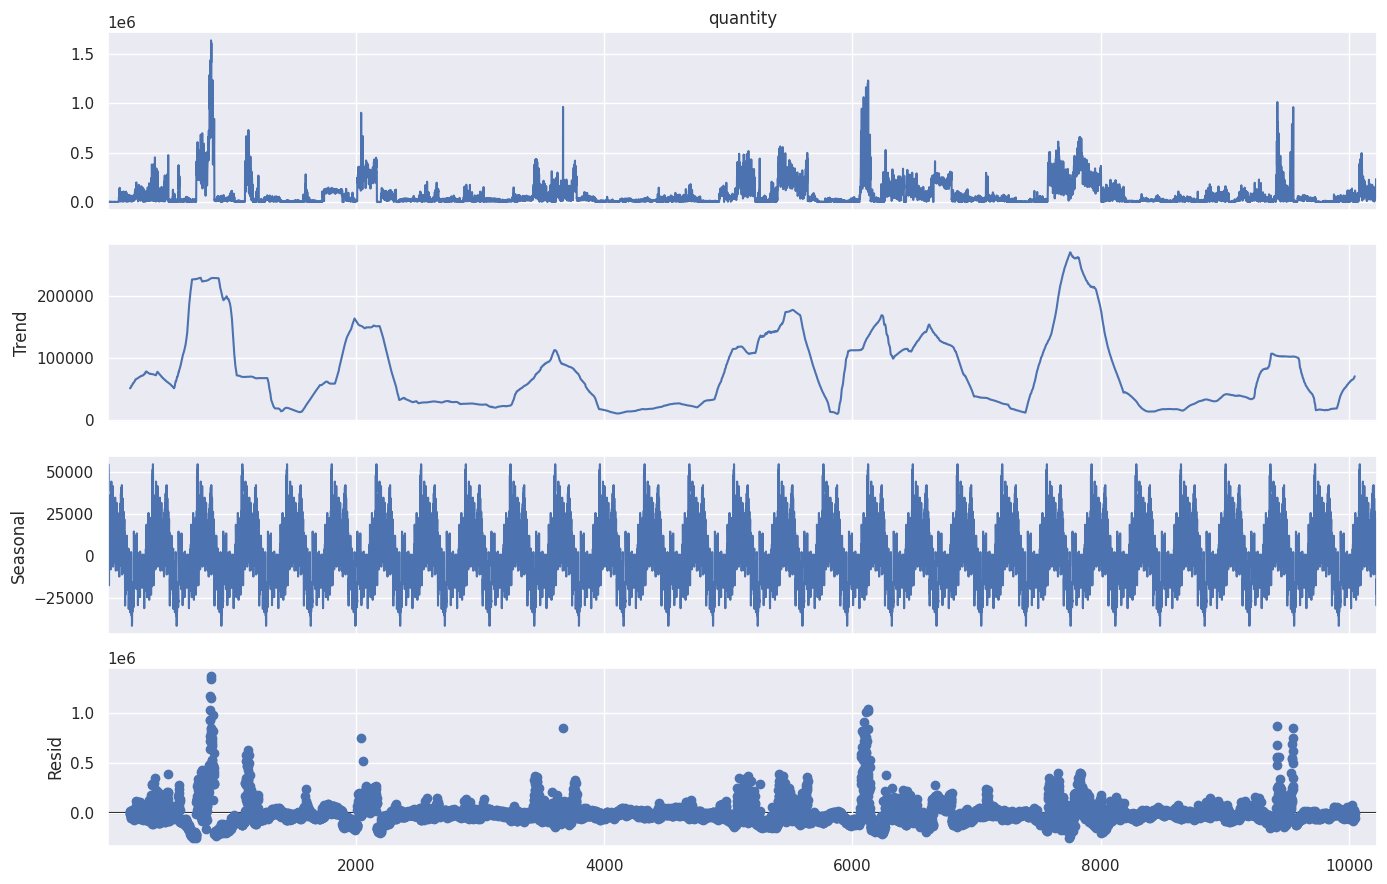

In [ ]:
# Seasonal decomposition
plt.rcParams['figure.figsize'] = (14, 9)
decomposition_quantity = sm.tsa.seasonal_decompose(df['quantity'], model='additive', period=360)
decomposition_quantity.plot()
plt.show()

- Trend Analysis: The trend component shows an upward and downward trend, which indicates that the quantity of commodities is increasing and decreasing over time around a certain level.
- Seasonal Analysis: The seasonal component shows regular peaks and troughs, it indicates the presence of seasonality.
- Residual Analysis: The residual component helps to identify any anomalies or unusual patterns not captured by the trend or seasonal components.

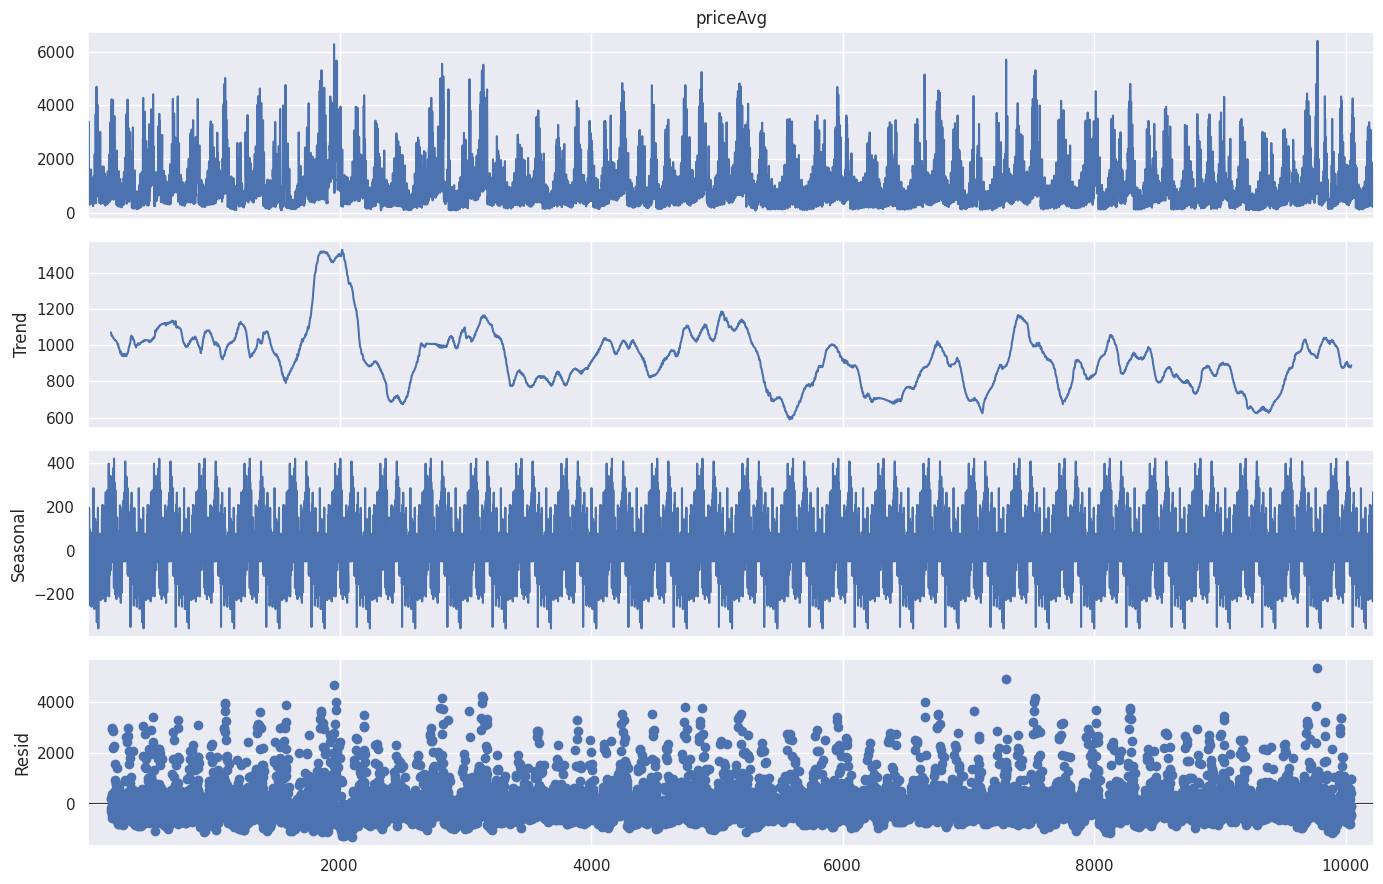

In [ ]:
plt.rcParams['figure.figsize'] = (14, 9)
decomposition_price = sm.tsa.seasonal_decompose(df['priceAvg'], model='additive', period=360)
decomposition_price.plot()
plt.show()

In [ ]:
# Save the variable to a file using pickle
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [9]:
# Load the variable from the file
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

## Model Training and Evaluation

In [10]:
# Reset index
#df.reset_index(inplace=True)

In [11]:
# Set the date as index
df.set_index('date', inplace=True)

# Ensure the DataFrame is sorted by date
df = df.sort_values(by='date')

# Splitting data into training and testing (80/20 split)
split = int(0.8 * len(df))
train = df.iloc[:split]
test = df.iloc[split:]

In [12]:
print(len(train))
print(len(test))

8180
2045


In [13]:
# Display the first and last values of the train set
print("Train Set - First Values:")
print(train.head())
print("\nTrain Set - Last Values:")
print(train.tail())

# Display the first and last values of the test set
print("\nTest Set - First Values:")
print(test.head())
print("\nTest Set - Last Values:")
print(test.tail())

Train Set - First Values:
            market  month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                      
1996-01-01      68      1  1996    225063       160       257       226   
1996-02-01      68      2  1996    196164       133       229       186   
1996-03-01      68      3  1996    178992       155       274       243   
1996-04-01      68      4  1996    192592       136       279       254   
1996-05-01      68      5  1996    237574       154       312       269   

            priceAvg  quantity_anomaly  priceAvg_anomaly  quantity_lag1  \
date                                                                      
1996-01-01     208.5                 0                 0        47687.0   
1996-02-01     181.0                 0                 0       563321.0   
1996-03-01     214.5                 0                 0       292870.0   
1996-04-01     207.5                 0                 0       494835.0  

In [14]:
# Check for missing values in train and test sets
print(train.isna().sum())
print(test.isna().sum())

market                     0
month                      0
year                       0
quantity                   0
priceMin                   0
priceMax                   0
priceMod                   0
priceAvg                   0
quantity_anomaly           0
priceAvg_anomaly           0
quantity_lag1              0
priceAvg_lag1              0
quantity_rolling_mean_3    0
priceAvg_rolling_mean_3    0
quarter                    0
dtype: int64
market                     0
month                      0
year                       0
quantity                   0
priceMin                   0
priceMax                   0
priceMod                   0
priceAvg                   0
quantity_anomaly           0
priceAvg_anomaly           0
quantity_lag1              0
priceAvg_lag1              0
quantity_rolling_mean_3    0
priceAvg_rolling_mean_3    0
quarter                    0
dtype: int64


## Statistical Tests

We will perform the Augmented Dickey-Fuller (ADF) test to check the stationarity of the quantity and priceAvg time series. Stationarity is a key assumption in many time series models, indicating that the statistical properties of the series do not change over time.

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'\nADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

# Check stationarity of quantity
adf_test(train['quantity'])

# Check stationarity of priceAvg
adf_test(train['priceAvg'])


ADF Statistic: -43.2536822534386
p-value: 0.0
Critial Values:
   1%, -3.4311500677923767
Critial Values:
   5%, -2.8618935736859252
Critial Values:
   10%, -2.5669582024910147

ADF Statistic: -2.2295941408298843
p-value: 0.19568032387167872
Critial Values:
   1%, -3.4311524239845292
Critial Values:
   5%, -2.8618946148165185
Critial Values:
   10%, -2.5669587566950463


The results of the Augmented Dickey-Fuller (ADF) test indicate the following:

  - The quantity series is stationary (p-value < 0.05).
  - The priceAvg series is non-stationary (p-value > 0.05).

Since the priceAvg series is non-stationary, we need to make it stationary before applying the ARIMA model. This can be achieved by differencing the series.

In [16]:
train = train.reset_index(drop=False)
test = test.reset_index(drop=False)

# Differencing the priceAvg series to make it stationary
train['priceAvg_diff'] = train['priceAvg'].diff().dropna()

In [17]:
# Set the date as the index
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)

# Display the first and last values of the train set
print("Train Set - First Values:")
print(train.head())
print("\nTrain Set - Last Values:")
print(train.tail())

# Display the first and last values of the test set
print("\nTest Set - First Values:")
print(test.head())
print("\nTest Set - Last Values:")
print(test.tail())

Train Set - First Values:
            market  month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                      
1996-01-01      68      1  1996    225063       160       257       226   
1996-02-01      68      2  1996    196164       133       229       186   
1996-03-01      68      3  1996    178992       155       274       243   
1996-04-01      68      4  1996    192592       136       279       254   
1996-05-01      68      5  1996    237574       154       312       269   

            priceAvg  quantity_anomaly  priceAvg_anomaly  quantity_lag1  \
date                                                                      
1996-01-01     208.5                 0                 0        47687.0   
1996-02-01     181.0                 0                 0       563321.0   
1996-03-01     214.5                 0                 0       292870.0   
1996-04-01     207.5                 0                 0       494835.0  

In [18]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

# Check stationarity of quantity
print("\nADF Test for Quantity:")
adf_test(train['quantity'])

# Check stationarity of differenced priceAvg
print("\nADF Test for Differenced PriceAvg:")
adf_test(train['priceAvg_diff'].dropna())


ADF Test for Quantity:
ADF Statistic: -43.2536822534386
p-value: 0.0
Critical Values:
   1%, -3.4311500677923767
Critical Values:
   5%, -2.8618935736859252
Critical Values:
   10%, -2.5669582024910147

ADF Test for Differenced PriceAvg:
ADF Statistic: -21.073556347216265
p-value: 0.0
Critical Values:
   1%, -3.431152818033127
Critical Values:
   5%, -2.8618947889346864
Critical Values:
   10%, -2.5669588493798696


Both p-values now are less than 0.05, and the ADF statistic is less than the critical values. Therefore, we reject the null hypothesis and conclude that the quantity and priceAvg series are stationary.

### ARIMA Model for Quantity Forecasting

In [19]:
# Auto ARIMA for quantity
auto_arima_quantity = auto_arima(train['quantity'], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_arima_quantity.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8180
Model:               SARIMAX(5, 1, 1)   Log Likelihood             -107191.702
Date:                Thu, 30 May 2024   AIC                         214399.403
Time:                        07:04:32   BIC                         214455.478
Sample:                             0   HQIC                        214418.575
                               - 8180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -47.5735     20.475     -2.323      0.020     -87.704      -7.443
ar.L1         -0.0026      0.013     -0.197      0.844      -0.029       0.024
ar.L2         -0.0085      0.013     -0.636      0.5

In [20]:
# Fit the model with optimal parameters
order = auto_arima_quantity.order
print(f"ARIMA order: {order}")
arima_model_quantity = ARIMA(train['quantity'], order=order)
arima_result_quantity = arima_model_quantity.fit()
print(arima_result_quantity.summary())

ARIMA order: (5, 1, 1)
                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                 8180
Model:                 ARIMA(5, 1, 1)   Log Likelihood             -107185.884
Date:                Thu, 30 May 2024   AIC                         214385.767
Time:                        07:04:44   BIC                         214434.832
Sample:                             0   HQIC                        214402.543
                               - 8180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0017      0.013      0.125      0.901      -0.025       0.028
ar.L2         -0.0042      0.013     -0.316      0.752      -0.030       0.022
ar.L3          0.0140      0.

ARIMA Model - Quantity Forecasting
Mean Absolute Error (MAE): 85386.00086257329
Mean Squared Error (MSE): 21172634800.81578
Root Mean Squared Error (RMSE): 145508.1949610254


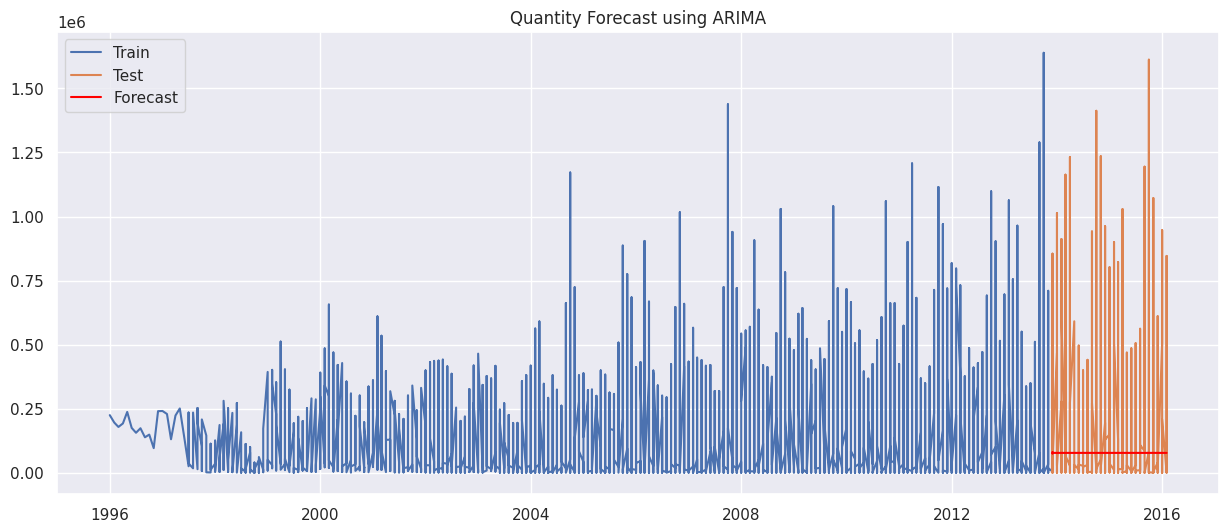

In [21]:
# Forecast for the test period
forecast_quantity = arima_result_quantity.forecast(steps=len(test))

# Evaluation metrics
mae_quantity = mean_absolute_error(test['quantity'], forecast_quantity)
mse_quantity = mean_squared_error(test['quantity'], forecast_quantity)
rmse_quantity = np.sqrt(mse_quantity)

print(f"ARIMA Model - Quantity Forecasting")
print(f"Mean Absolute Error (MAE): {mae_quantity}")
print(f"Mean Squared Error (MSE): {mse_quantity}")
print(f"Root Mean Squared Error (RMSE): {rmse_quantity}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index, test['quantity'], label='Test')
plt.plot(test.index, forecast_quantity, label='Forecast', color='red')
plt.legend()
plt.title('Quantity Forecast using ARIMA')
plt.show()

### ARIMA Model for Price Forecasting

In [22]:
# Auto ARIMA for priceAvg_diff
auto_arima_priceAvg = auto_arima(train['priceAvg_diff'].dropna(), seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_arima_priceAvg.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8179
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -58208.294
Date:                Thu, 30 May 2024   AIC                         116426.589
Time:                        07:06:06   BIC                         116461.636
Sample:                             0   HQIC                        116438.571
                               - 8179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3961      0.135     -2.932      0.003      -0.661      -0.131
ar.L2         -0.0342      0.007     -4.879      0.000      -0.048      -0.020
ma.L1         -0.4721      0.135     -3.491      0.0

ARIMA Model - Price Forecasting
Mean Absolute Error (MAE): 1314.8214382677118
Mean Squared Error (MSE): 2012858.7846011482
Root Mean Squared Error (RMSE): 1418.7525452316017


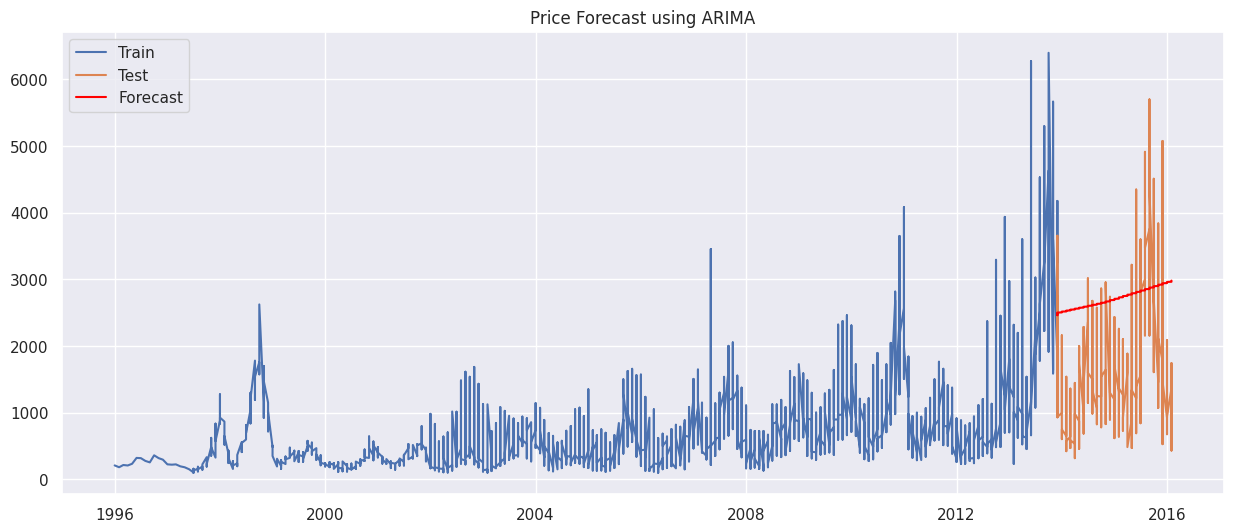

In [23]:
# Train ARIMA model for priceAvg
order_price = auto_arima_priceAvg.order
arima_model_priceAvg = ARIMA(train['priceAvg_diff'].dropna(), order=order_price)
arima_result_priceAvg = arima_model_priceAvg.fit()

# Forecast for the test period
forecast_priceAvg_diff = arima_result_priceAvg.forecast(steps=len(test))
forecast_priceAvg = train['priceAvg'].iloc[-1] + forecast_priceAvg_diff.cumsum()

# Evaluation metrics
mae_priceAvg = mean_absolute_error(test['priceAvg'], forecast_priceAvg)
mse_priceAvg = mean_squared_error(test['priceAvg'], forecast_priceAvg)
rmse_priceAvg = np.sqrt(mse_priceAvg)

print(f"ARIMA Model - Price Forecasting")
print(f"Mean Absolute Error (MAE): {mae_priceAvg}")
print(f"Mean Squared Error (MSE): {mse_priceAvg}")
print(f"Root Mean Squared Error (RMSE): {rmse_priceAvg}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['priceAvg'], label='Train')
plt.plot(test.index, test['priceAvg'], label='Test')
plt.plot(test.index, forecast_priceAvg, label='Forecast', color='red')
plt.legend()
plt.title('Price Forecast using ARIMA')
plt.show()

### SARIMA Model for Quantity Forecasting

In [24]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Auto SARIMA for quantity to determine the best seasonal order
# auto_sarima_quantity = auto_arima(train['quantity'], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
# print(auto_sarima_quantity.summary())

SARIMA Model - Quantity Forecasting
Mean Absolute Error (MAE): 85386.00086257329
Mean Squared Error (MSE): 21172634800.81578
Root Mean Squared Error (RMSE): 145508.1949610254


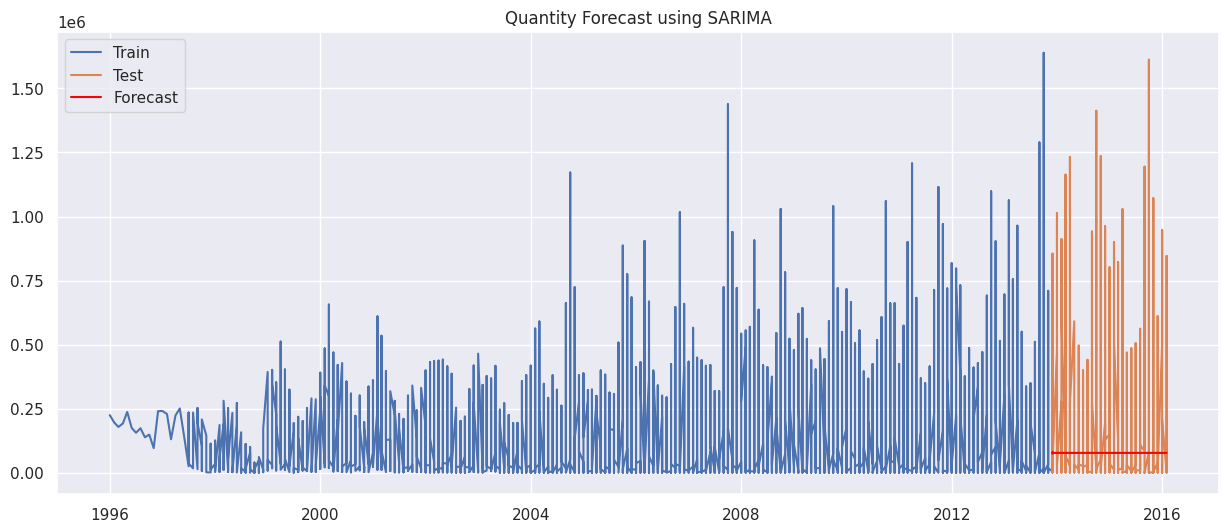

In [25]:
# Train SARIMA model for quantity
# seasonal_order = auto_sarima_quantity.seasonal_order
# order = auto_sarima_quantity.order
sarima_model_quantity = SARIMAX(train['quantity'], order=(5,1,1), seasonal_order=(0,0,0,12))
sarima_result_quantity = sarima_model_quantity.fit()

# Forecast for the test period
forecast_quantity_sarima = sarima_result_quantity.forecast(steps=len(test))

# Evaluation metrics
mae_quantity_sarima = mean_absolute_error(test['quantity'], forecast_quantity_sarima)
mse_quantity_sarima = mean_squared_error(test['quantity'], forecast_quantity_sarima)
rmse_quantity_sarima = np.sqrt(mse_quantity_sarima)

print(f"SARIMA Model - Quantity Forecasting")
print(f"Mean Absolute Error (MAE): {mae_quantity_sarima}")
print(f"Mean Squared Error (MSE): {mse_quantity_sarima}")
print(f"Root Mean Squared Error (RMSE): {rmse_quantity_sarima}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index, test['quantity'], label='Test')
plt.plot(test.index, forecast_quantity_sarima, label='Forecast', color='red')
plt.legend()
plt.title('Quantity Forecast using SARIMA')
plt.show()


### SARIMA Model for Price Forecasting

In [26]:
# # Auto SARIMA for priceAvg_diff to determine the best seasonal order
# auto_sarima_priceAvg = auto_arima(train['priceAvg_diff'].dropna(), seasonal=True, m=12, stepwise=True, suppress_warnings=True)
# print(auto_sarima_priceAvg.summary())

SARIMA Model - Price Forecasting
Mean Absolute Error (MAE): 1153.8822807747397
Mean Squared Error (MSE): 1573321.6045946602
Root Mean Squared Error (RMSE): 1254.321172824034


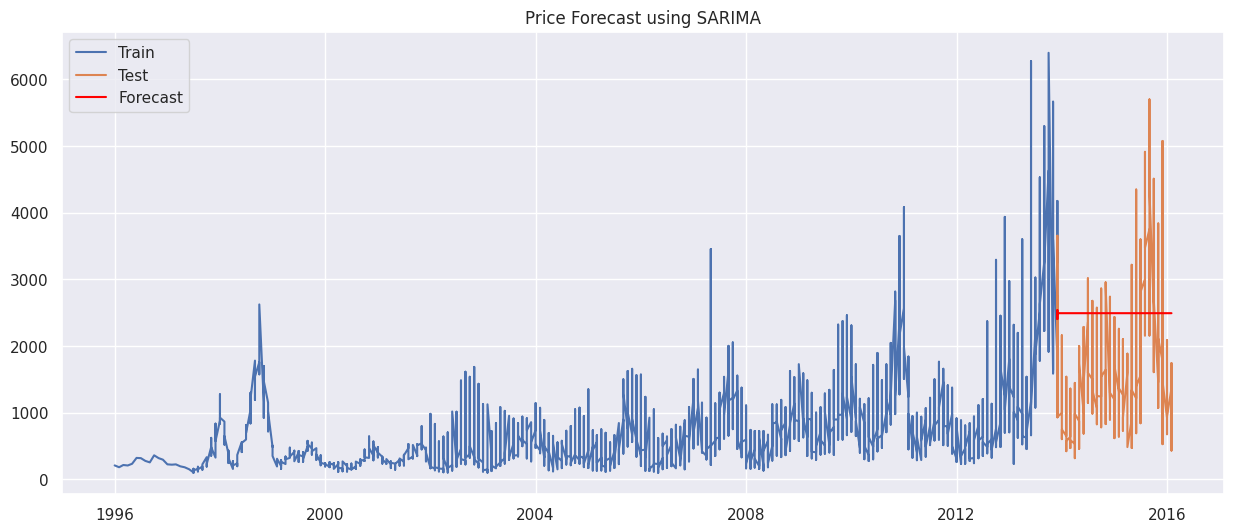

In [27]:
# Train SARIMA model for priceAvg_diff
# seasonal_order_price = auto_sarima_priceAvg.seasonal_order
# order_price = auto_sarima_priceAvg.order
sarima_model_priceAvg = SARIMAX(train['priceAvg_diff'].dropna(), order=(2,0,1), seasonal_order=(0,0,2,12))
sarima_result_priceAvg = sarima_model_priceAvg.fit()

# Forecast for the test period
forecast_priceAvg_diff_sarima = sarima_result_priceAvg.forecast(steps=len(test))
forecast_priceAvg_sarima = train['priceAvg'].iloc[-1] + forecast_priceAvg_diff_sarima.cumsum()

# Evaluation metrics
mae_priceAvg_sarima = mean_absolute_error(test['priceAvg'], forecast_priceAvg_sarima)
mse_priceAvg_sarima = mean_squared_error(test['priceAvg'], forecast_priceAvg_sarima)
rmse_priceAvg_sarima = np.sqrt(mse_priceAvg_sarima)

print(f"SARIMA Model - Price Forecasting")
print(f"Mean Absolute Error (MAE): {mae_priceAvg_sarima}")
print(f"Mean Squared Error (MSE): {mse_priceAvg_sarima}")
print(f"Root Mean Squared Error (RMSE): {rmse_priceAvg_sarima}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['priceAvg'], label='Train')
plt.plot(test.index, test['priceAvg'], label='Test')
plt.plot(test.index, forecast_priceAvg_sarima, label='Forecast', color='red')
plt.legend()
plt.title('Price Forecast using SARIMA')
plt.show()

### Prophet Model for Quantity Forecasting

In [28]:
# DataFrame for 'quantity'
df_prophet_quantity = train[['quantity']].rename(columns={'quantity': 'y'}).reset_index().rename(columns={'date': 'ds'})

# Initialize and fit the Prophet model for quantity
prophet_model_quantity = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
prophet_model_quantity.fit(df_prophet_quantity)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ycmue8i/72vtyv04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ycmue8i/me9gm4pq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4386', 'data', 'file=/tmp/tmp1ycmue8i/72vtyv04.json', 'init=/tmp/tmp1ycmue8i/me9gm4pq.json', 'output', 'file=/tmp/tmp1ycmue8i/prophet_modelrywh7kuo/prophet_model-20240530070657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
prophet_forecast_quantity = prophet_model_quantity.make_future_dataframe(periods=len(test))
prophet_forecast_quantity = prophet_model_quantity.predict(prophet_forecast_quantity)
prophet_forecast_quantity = prophet_forecast_quantity[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds')

In [30]:
# Create a future dataframe using the dates from the test set
future_quantity_dates = test.reset_index()[['date']].rename(columns={'date': 'ds'})
future_quantity = prophet_model_quantity.make_future_dataframe(periods=0)

Prophet Model - Quantity Forecasting
Mean Absolute Error (MAE): 87611.3187128739
Mean Squared Error (MSE): 20882222825.640717
Root Mean Squared Error (RMSE): 144506.82622506356


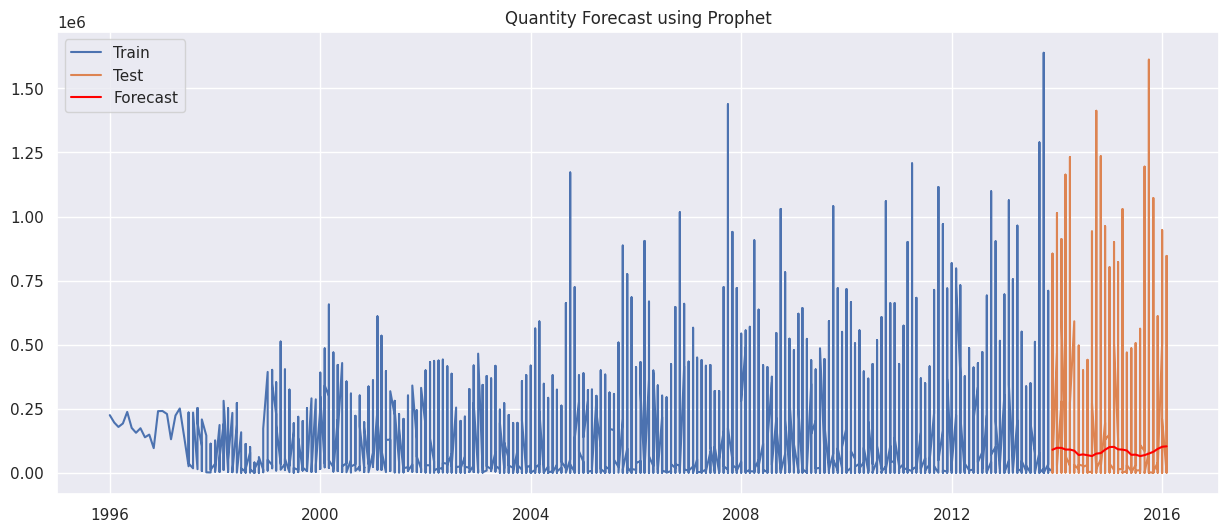

In [31]:
# Concatenate future dates
future_quantity = pd.concat([future_quantity, future_quantity_dates]).drop_duplicates().reset_index(drop=True)

# Predict the future values
prophet_forecast_quantity = prophet_model_quantity.predict(future_quantity)

# Extract forecast for test period
prophet_forecast_quantity_test = prophet_forecast_quantity.set_index('ds').loc[future_quantity_dates['ds']]

# Evaluation metrics
mae_quantity_prophet = mean_absolute_error(test['quantity'], prophet_forecast_quantity_test['yhat'])
mse_quantity_prophet = mean_squared_error(test['quantity'], prophet_forecast_quantity_test['yhat'])
rmse_quantity_prophet = np.sqrt(mse_quantity_prophet)

print(f"Prophet Model - Quantity Forecasting")
print(f"Mean Absolute Error (MAE): {mae_quantity_prophet}")
print(f"Mean Squared Error (MSE): {mse_quantity_prophet}")
print(f"Root Mean Squared Error (RMSE): {rmse_quantity_prophet}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.reset_index()['date'], train['quantity'], label='Train')
plt.plot(test.reset_index()['date'], test['quantity'], label='Test')
plt.plot(prophet_forecast_quantity_test.index, prophet_forecast_quantity_test['yhat'], label='Forecast', color='red')
plt.legend()
plt.title('Quantity Forecast using Prophet')
plt.show()

### Prophet Model for Price Forecasting

In [32]:
# Prepare the training data for Prophet
df_prophet_price = train[['priceAvg']].rename(columns={'priceAvg': 'y'}).reset_index().rename(columns={'date': 'ds'})

# Initialize and fit the Prophet model for priceAvg
prophet_model_price = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
prophet_model_price.fit(df_prophet_price)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ycmue8i/k5ww0z34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ycmue8i/v1vwsg8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27591', 'data', 'file=/tmp/tmp1ycmue8i/k5ww0z34.json', 'init=/tmp/tmp1ycmue8i/v1vwsg8t.json', 'output', 'file=/tmp/tmp1ycmue8i/prophet_modelv_0vibz2/prophet_model-20240530070701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model - Price Forecasting
Mean Absolute Error (MAE): 1979.9064836946764
Mean Squared Error (MSE): 4562644.303320627
Root Mean Squared Error (RMSE): 2136.0347149146774


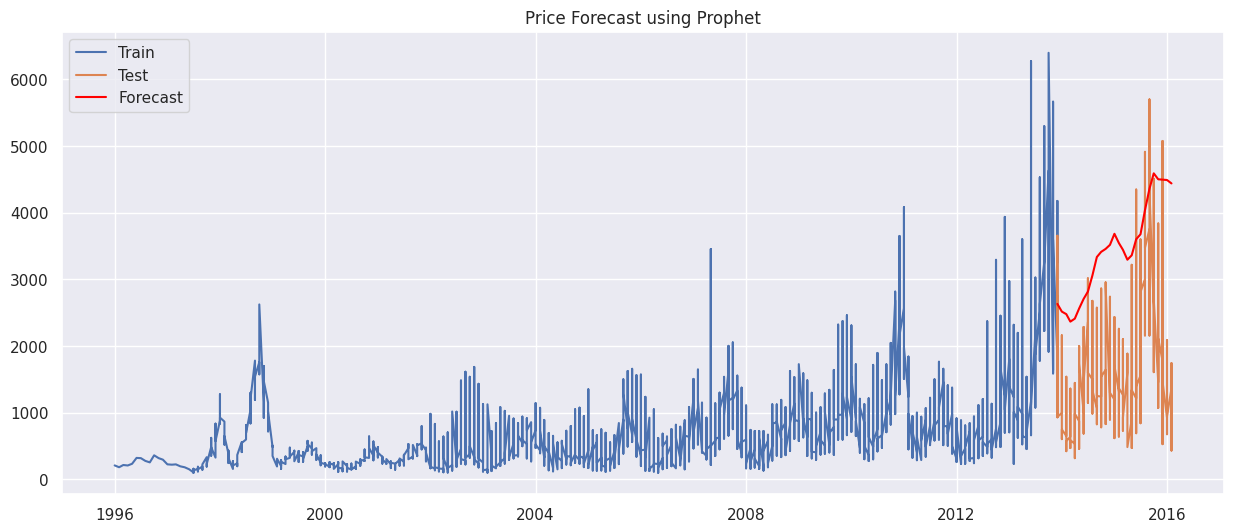

In [33]:
# Create a future dataframe using the dates from the test set
future_price_dates = test.reset_index()[['date']].rename(columns={'date': 'ds'})
future_price = prophet_model_price.make_future_dataframe(periods=0)

# Concatenate future dates
future_price = pd.concat([future_price, future_price_dates]).drop_duplicates().reset_index(drop=True)

# Predict the future values
prophet_forecast_price = prophet_model_price.predict(future_price)

# Extract forecast for test period
prophet_forecast_price_test = prophet_forecast_price.set_index('ds').loc[future_price_dates['ds']]

# Evaluation metrics
mae_price_prophet = mean_absolute_error(test['priceAvg'], prophet_forecast_price_test['yhat'])
mse_price_prophet = mean_squared_error(test['priceAvg'], prophet_forecast_price_test['yhat'])
rmse_price_prophet = np.sqrt(mse_price_prophet)

print(f"Prophet Model - Price Forecasting")
print(f"Mean Absolute Error (MAE): {mae_price_prophet}")
print(f"Mean Squared Error (MSE): {mse_price_prophet}")
print(f"Root Mean Squared Error (RMSE): {rmse_price_prophet}")

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train.reset_index()['date'], train['priceAvg'], label='Train')
plt.plot(test.reset_index()['date'], test['priceAvg'], label='Test')
plt.plot(prophet_forecast_price_test.index, prophet_forecast_price_test['yhat'], label='Forecast', color='red')
plt.legend()
plt.title('Price Forecast using Prophet')
plt.show()

### LSTM Model for Quantity Forecasting

In [35]:
# Train and test DataFrames are already defined
train_lstm = train.reset_index()
test_lstm = test.reset_index()

# Combine train and test for scaling
data = pd.concat([train_lstm, test_lstm])

# Scaling the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['quantity', 'priceAvg']])

# Split the scaled data back into train and test sets
train_scaled = data_scaled[:len(train_lstm)]
test_scaled = data_scaled[len(train_lstm):]

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys_quantity, ys_price = [], [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y_quantity = data[i+seq_length, 0]
        y_price = data[i+seq_length, 1]
        xs.append(x)
        ys_quantity.append(y_quantity)
        ys_price.append(y_price)
    return np.array(xs), np.array(ys_quantity), np.array(ys_price)

# Create sequences
SEQ_LENGTH = 12
X_train, y_train_quantity, y_train_price = create_sequences(train_scaled, SEQ_LENGTH)
X_test, y_test_quantity, y_test_price = create_sequences(test_scaled, SEQ_LENGTH)

# Define the LSTM model for quantity
model_quantity = Sequential()
model_quantity.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 2)))
model_quantity.add(LSTM(50))
model_quantity.add(Dense(1))
model_quantity.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model for quantity
history_quantity = model_quantity.fit(X_train, y_train_quantity, epochs=50, batch_size=32, validation_split=0.2)

# Predict the future values for quantity
predicted_quantity = model_quantity.predict(X_test)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0057 - val_loss: 0.0071
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0045 - val_loss: 0.0071
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0048 - val_loss: 0.0071
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0049 - val_loss: 0.0071
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0048 - val_loss: 0.0072
Epoch 9/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0051 - val_loss: 0.0071
Epoch 10/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0052 - val_loss: 0.0071
Epoch 11/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0047 - val_loss: 0.0071
Epoch 12/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
# Inverse transform the predictions and actual values
predicted_quantity = scaler.inverse_transform(np.concatenate((predicted_quantity, np.zeros((predicted_quantity.shape[0], 1))), axis=1))[:, 0]
y_test_quantity = scaler.inverse_transform(np.concatenate((y_test_quantity.reshape(-1, 1), np.zeros((y_test_quantity.shape[0], 1))), axis=1))[:, 0]

# Evaluation metrics for quantity
mae_quantity_lstm = mean_absolute_error(y_test_quantity, predicted_quantity)
mse_quantity_lstm = mean_squared_error(y_test_quantity, predicted_quantity)
rmse_quantity_lstm = np.sqrt(mse_quantity_lstm)

print(f"LSTM Model - Quantity Forecasting")
print(f"Mean Absolute Error (MAE): {mae_quantity_lstm}")
print(f"Mean Squared Error (MSE): {mse_quantity_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_quantity_lstm}")

LSTM Model - Quantity Forecasting
Mean Absolute Error (MAE): 80706.41193029156
Mean Squared Error (MSE): 21410294605.87603
Root Mean Squared Error (RMSE): 146322.5703911602


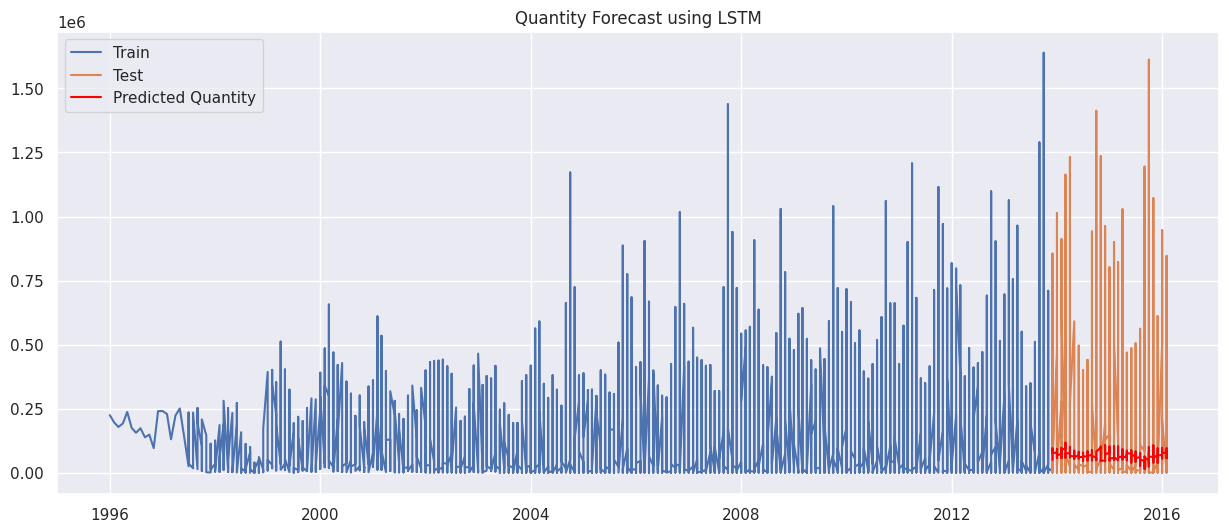

In [37]:
# Prepare the dates and values for plotting
train_dates = train_lstm['date'][SEQ_LENGTH:]
test_dates = test_lstm['date'][SEQ_LENGTH:]

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_lstm['date'], train_lstm['quantity'], label='Train')
plt.plot(test_lstm['date'], test_lstm['quantity'], label='Test')
plt.plot(test_dates, predicted_quantity, label='Predicted Quantity', color='red')
plt.legend()
plt.title('Quantity Forecast using LSTM')
plt.show()

### LSTM Model for Price Forecasting

In [38]:
# Define the LSTM model for priceAvg
model_price = Sequential()
model_price.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 2)))
model_price.add(LSTM(50))
model_price.add(Dense(1))
model_price.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model for priceAvg
history_price = model_price.fit(X_train, y_train_price, epochs=50, batch_size=32, validation_split=0.2)

# Predict the future values for priceAvg
predicted_price = model_price.predict(X_test)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0028 - val_loss: 0.0059
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0015 - val_loss: 0.0063
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 9/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 10/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 11/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 12/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 

In [39]:
# Inverse transform the predictions and actual values
predicted_price = scaler.inverse_transform(np.concatenate((np.zeros((predicted_price.shape[0], 1)), predicted_price), axis=1))[:, 1]
y_test_price = scaler.inverse_transform(np.concatenate((np.zeros((y_test_price.shape[0], 1)), y_test_price.reshape(-1, 1)), axis=1))[:, 1]

# Evaluation metrics for priceAvg
mae_price_lstm = mean_absolute_error(y_test_price, predicted_price)
mse_price_lstm = mean_squared_error(y_test_price, predicted_price)
rmse_price_lstm = np.sqrt(mse_price_lstm)

print(f"LSTM Model - Price Forecasting")
print(f"Mean Absolute Error (MAE): {mae_price_lstm}")
print(f"Mean Squared Error (MSE): {mse_price_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_price_lstm}")

LSTM Model - Price Forecasting
Mean Absolute Error (MAE): 364.2158013914446
Mean Squared Error (MSE): 237027.2286157654
Root Mean Squared Error (RMSE): 486.8544224054716


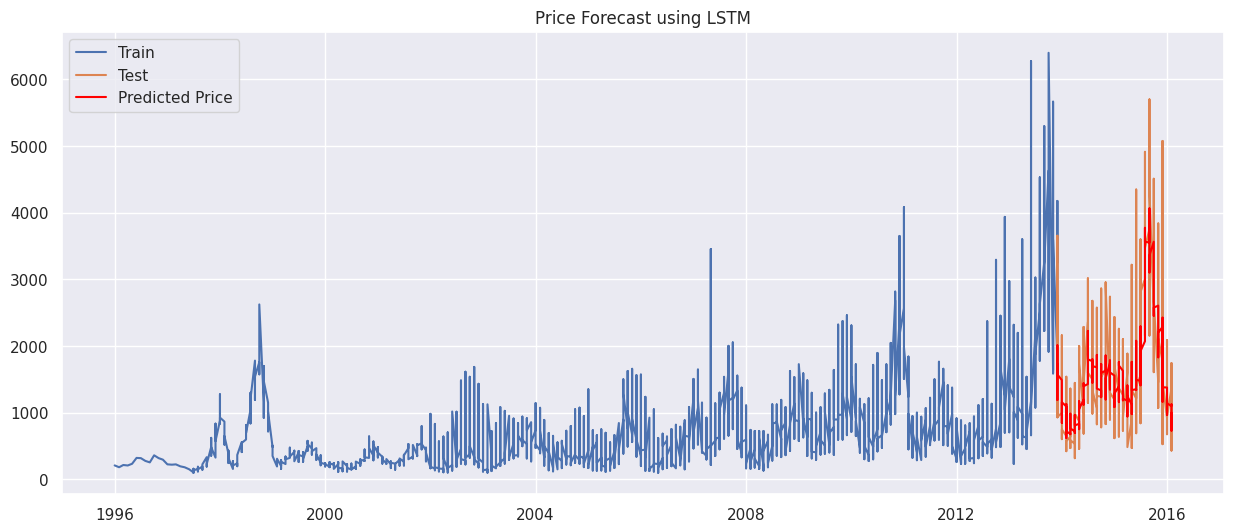

In [40]:
# Prepare the dates and values for plotting
train_dates = train_lstm['date'][SEQ_LENGTH:]
test_dates = test_lstm['date'][SEQ_LENGTH:]

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_lstm['date'], train_lstm['priceAvg'], label='Train')
plt.plot(test_lstm['date'], test_lstm['priceAvg'], label='Test')
plt.plot(test_dates, predicted_price, label='Predicted Price', color='red')
plt.legend()
plt.title('Price Forecast using LSTM')
plt.show()

In [41]:
results_quantity = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'MAE': [mae_quantity, mae_quantity_sarima, mae_quantity_prophet, mae_quantity_lstm],
    'MSE': [mse_quantity, mse_quantity_sarima, mse_quantity_prophet, mse_quantity_lstm],
    'RMSE': [rmse_quantity, rmse_quantity_sarima, rmse_quantity_prophet, rmse_quantity_lstm]
}

df_results_quantity = pd.DataFrame(results_quantity)
df_results_quantity

Model           MAE           MSE           RMSE
0    ARIMA  85386.000863  2.117263e+10  145508.194961
1   SARIMA  85386.000863  2.117263e+10  145508.194961
2  Prophet  87611.318713  2.088222e+10  144506.826225
3     LSTM  80706.411930  2.141029e+10  146322.570391

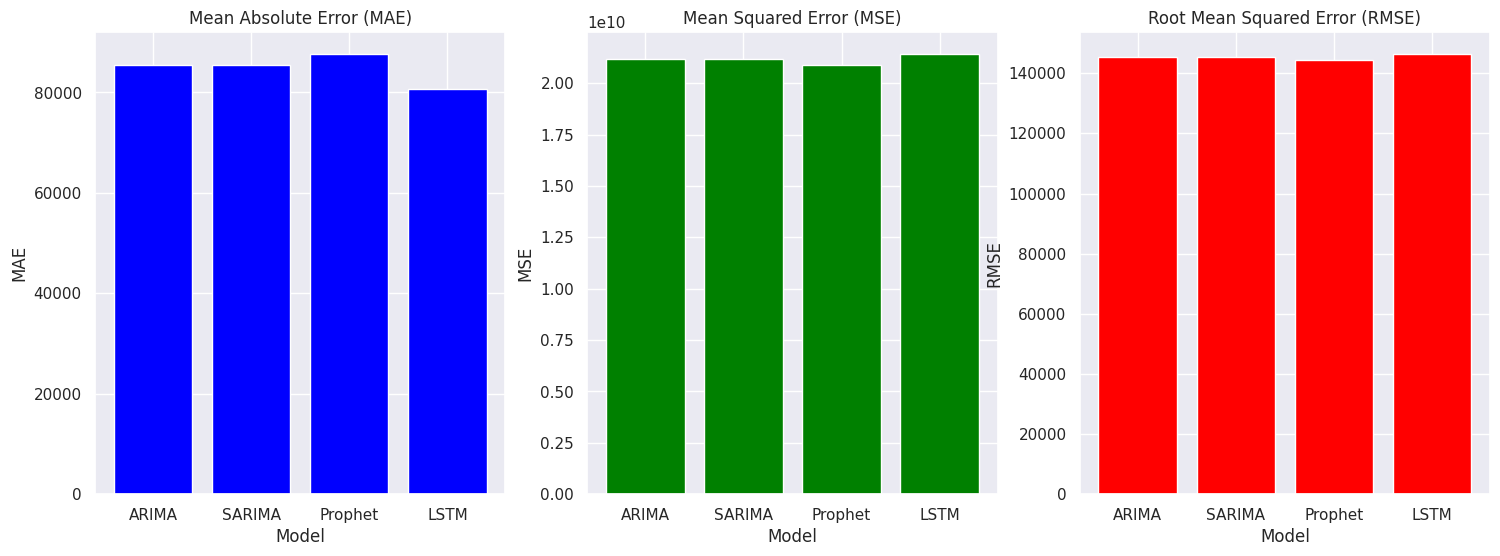

In [42]:
# Plotting the results
plt.figure(figsize=(18, 6))

# Plot MAE
plt.subplot(1, 3, 1)
plt.bar(df_results_quantity['Model'], df_results_quantity['MAE'], color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(1, 3, 2)
plt.bar(df_results_quantity['Model'], df_results_quantity['MSE'], color='green')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(1, 3, 3)
plt.bar(df_results_quantity['Model'], df_results_quantity['RMSE'], color='red')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.show()

In [43]:
# Compare Models for Price Forecasting
results_price = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'MAE': [mae_priceAvg, mae_priceAvg_sarima, mae_price_prophet, mae_price_lstm],
    'MSE': [mse_priceAvg, mse_priceAvg_sarima, mse_price_prophet, mse_price_lstm],
    'RMSE': [rmse_priceAvg, rmse_priceAvg_sarima, rmse_price_prophet, rmse_price_lstm]
}

df_results_price = pd.DataFrame(results_price)
df_results_price

Model          MAE           MSE         RMSE
0    ARIMA  1314.821438  2.012859e+06  1418.752545
1   SARIMA  1153.882281  1.573322e+06  1254.321173
2  Prophet  1979.906484  4.562644e+06  2136.034715
3     LSTM   364.215801  2.370272e+05   486.854422

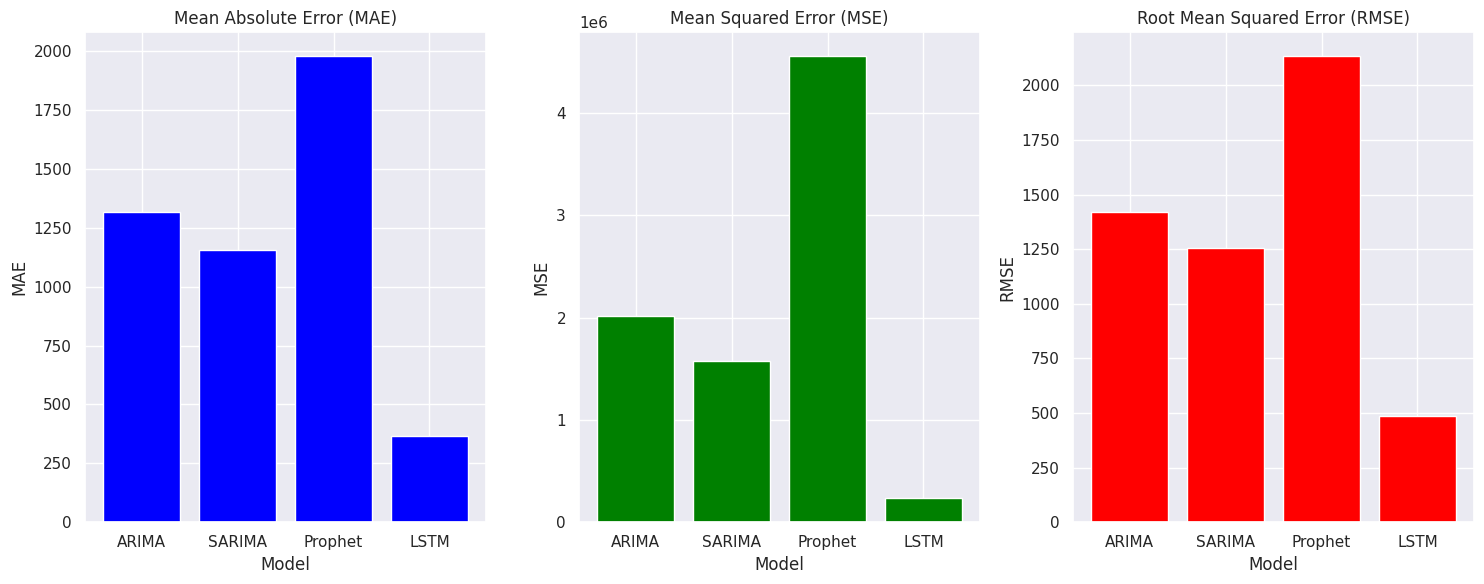

In [44]:
# Plotting the results
plt.figure(figsize=(15, 6))

# Plot MAE
plt.subplot(1, 3, 1)
plt.bar(df_results_price['Model'], df_results_price['MAE'], color='blue')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(1, 3, 2)
plt.bar(df_results_price['Model'], df_results_price['MSE'], color='green')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(1, 3, 3)
plt.bar(df_results_price['Model'], df_results_price['RMSE'], color='red')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

### Overall Conclusion
#### Quantity Forecasting:

- The LSTM model has the lowest MAE, indicating it may be more accurate on average for quantity forecasting.
- Prophet has  the lowest MSE, suggesting it handles large deviations better.
- Prophet has the lowest RMSE, providing a balanced performance in both small and large errors.

#### Price Forecasting:

- The LSTM model outperforms all other models significantly in terms of MAE, MSE, and RMSE.

This makes LSTM the most suitable model for price forecasting based on the given metrics.

#### Recommended Models:

For quantity forecasting, the LSTM model is recommended for its lowest MAE.
For price forecasting, the LSTM model is clearly the best performer across all metrics.

Next steps should include fine-tuning the LSTM model parameters to potentially improve performance even further and validating the model on unseen data to ensure robustness.

## Fine Tuning the Best Model

In [ ]:
# Function to create the LSTM model
def create_lstm_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 2)))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(model=create_lstm_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'model__units': [50, 100, 150],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train_quantity)

# Print the best parameters and best score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

In [ ]:
# Retrieve the best model
best_model = grid_result.best_estimator_

# Train the best model on the entire training set
best_model.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train_quantity, y_test_quantity)))

# Predict on the test set
final_predictions_quantity = best_model.predict(X_test)

# Inverse transform the predictions
scaler = MinMaxScaler()
scaler.fit(data[['quantity', 'priceAvg']])
final_predictions_quantity = scaler.inverse_transform(
    np.concatenate((final_predictions_quantity.reshape(-1, 1), np.zeros((final_predictions_quantity.shape[0], 1))), axis=1)
)[:, 0]
final_y_test_quantity = scaler.inverse_transform(
    np.concatenate((y_test_quantity.reshape(-1, 1), np.zeros((y_test_quantity.shape[0], 1))), axis=1)
)[:, 0]

# Final evaluation metrics for quantity
mae_final_quantity = mean_absolute_error(final_y_test_quantity, final_predictions_quantity)
mse_final_quantity = mean_squared_error(final_y_test_quantity, final_predictions_quantity)
rmse_final_quantity = np.sqrt(mse_final_quantity)

print(f"Final LSTM Model - Quantity Forecasting")
print(f"Mean Absolute Error (MAE): {mae_final_quantity}")
print(f"Mean Squared Error (MSE): {mse_final_quantity}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_quantity}")

# Plotting the results for quantity
plt.figure(figsize=(15, 6))
plt.plot(test_lstm['date'][SEQ_LENGTH:], final_y_test_quantity, label='Actual Quantity')
plt.plot(test_lstm['date'][SEQ_LENGTH:], final_predictions_quantity, label='Predicted Quantity', color='red')
plt.legend()
plt.title('Quantity Forecast using LSTM')
plt.show()

In [ ]:
# Function to create the LSTM model
def create_lstm_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(SEQ_LENGTH, 2)))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
model_price = KerasRegressor(model=create_lstm_model, verbose=0)

# Define the grid search parameters
param_grid_price = {
    'model__units': [50, 100, 150],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Create GridSearchCV for priceAvg
grid_price = GridSearchCV(estimator=model_price, param_grid=param_grid_price, n_jobs=-1, cv=3)
grid_result_price = grid_price.fit(X_train, y_train_price)

# Print the best parameters and best score for priceAvg
print(f"Best parameters for priceAvg: {grid_result_price.best_params_}")
print(f"Best score for priceAvg: {grid_result_price.best_score_}")

# Retrieve the best model for priceAvg
best_model_price = grid_result_price.best_estimator_

In [ ]:
# Train the best model on the entire training set for priceAvg
best_model_price.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train_price, y_test_price)))

# Predict on the test set for priceAvg
final_predictions_price = best_model_price.predict(X_test)

# Inverse transform the predictions for priceAvg
scaler = MinMaxScaler()
scaler.fit(data[['quantity', 'priceAvg']])
final_predictions_price = scaler.inverse_transform(
    np.concatenate((np.zeros((final_predictions_price.shape[0], 1)), final_predictions_price.reshape(-1, 1)), axis=1)
)[:, 1]
final_y_test_price = scaler.inverse_transform(
    np.concatenate((np.zeros((y_test_price.shape[0], 1)), y_test_price.reshape(-1, 1)), axis=1)
)[:, 1]

# Final evaluation metrics for priceAvg
mae_final_price = mean_absolute_error(final_y_test_price, final_predictions_price)
mse_final_price = mean_squared_error(final_y_test_price, final_predictions_price)
rmse_final_price = np.sqrt(mse_final_price)

print(f"Final LSTM Model - Price Forecasting")
print(f"Mean Absolute Error (MAE): {mae_final_price}")
print(f"Mean Squared Error (MSE): {mse_final_price}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_price}")

# Plotting the results for price
plt.figure(figsize=(15, 6))
plt.plot(test_lstm['date'][SEQ_LENGTH:], final_y_test_price, label='Actual Price')
plt.plot(test_lstm['date'][SEQ_LENGTH:], final_predictions_price, label='Predicted Price', color='red')
plt.legend()
plt.title('Price Forecast using LSTM')
plt.show()

In [ ]:
# Save the best model for Quantity
best_model_quantity = grid_result.best_estimator_
joblib.dump(best_model_quantity, 'best_model_quantity.pkl')

In [ ]:
# Save the best model for priceAvg
best_model_price = grid_result_price.best_estimator_
joblib.dump(best_model_price, 'best_model_price.pkl')